# Dow Jones Index Trading Signal Prediction
> dataset: https://archive.ics.uci.edu/dataset/312/dow+jones+index

### Data Loading & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import warnings

# remove warnings
warnings.filterwarnings("ignore")

# fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

# data (as pandas dataframes)
# print(dow_jones_index.data.features)
# print("\n----\n")
# print(dow_jones_index.data.targets)
# print(dow_jones_index.variables)

df = pd.concat([dow_jones_index.data.features, dow_jones_index.data.targets], axis=1)
df.info()
df["stock"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

count     750
unique     30
top        AA
freq       25
Name: stock, dtype: object

In [2]:
# set global drawing parameters
plt.rcParams.update({"font.size": 14, "lines.linewidth": 2, "lines.markersize": 8})

cols_to_convert = [
    "open",
    "high",
    "low",
    "close",
    "volume",
    "percent_change_price",
    "percent_change_volume_over_last_wk",
    "previous_weeks_volume",
    "next_weeks_open",
    "next_weeks_close",
    "days_to_next_dividend",
    "percent_return_next_dividend",
]

# remove '$' and ',' from each column and convert them to numerical values
for col in cols_to_convert:
    dow_jones_index.data.features[col] = (
        dow_jones_index.data.features[col]
        .astype(str)
        .str.replace(r"[\$,]", "", regex=True)
    )
    dow_jones_index.data.features[col] = pd.to_numeric(
        dow_jones_index.data.features[col], errors="coerce"
    )

# date conversion
if "date" in dow_jones_index.data.features.columns:
    dow_jones_index.data.features["date"] = pd.to_datetime(
        dow_jones_index.data.features["date"], errors="coerce"
    )
else:
    dow_jones_index.data.features["date"] = pd.date_range(
        start="2000-01-01", periods=len(dow_jones_index.data.features), freq="W"
    )

# sort by date
dow_jones_index.data.features.sort_values(by="date", inplace=True)

# get all stock codes
unique_stocks = sorted(dow_jones_index.data.features["stock"].unique())

# generate color mapping based on the number of stocks
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_stocks)))
color_dict = dict(zip(unique_stocks, colors))

start_limit = pd.to_datetime("2011-01-01")
end_limit = pd.to_datetime("2011-07-02")
unique_dates = np.array(sorted(dow_jones_index.data.features["date"].unique()))
ticks = unique_dates[(unique_dates >= start_limit) & (unique_dates <= end_limit)]
ticks = pd.to_datetime(ticks).to_pydatetime().tolist()


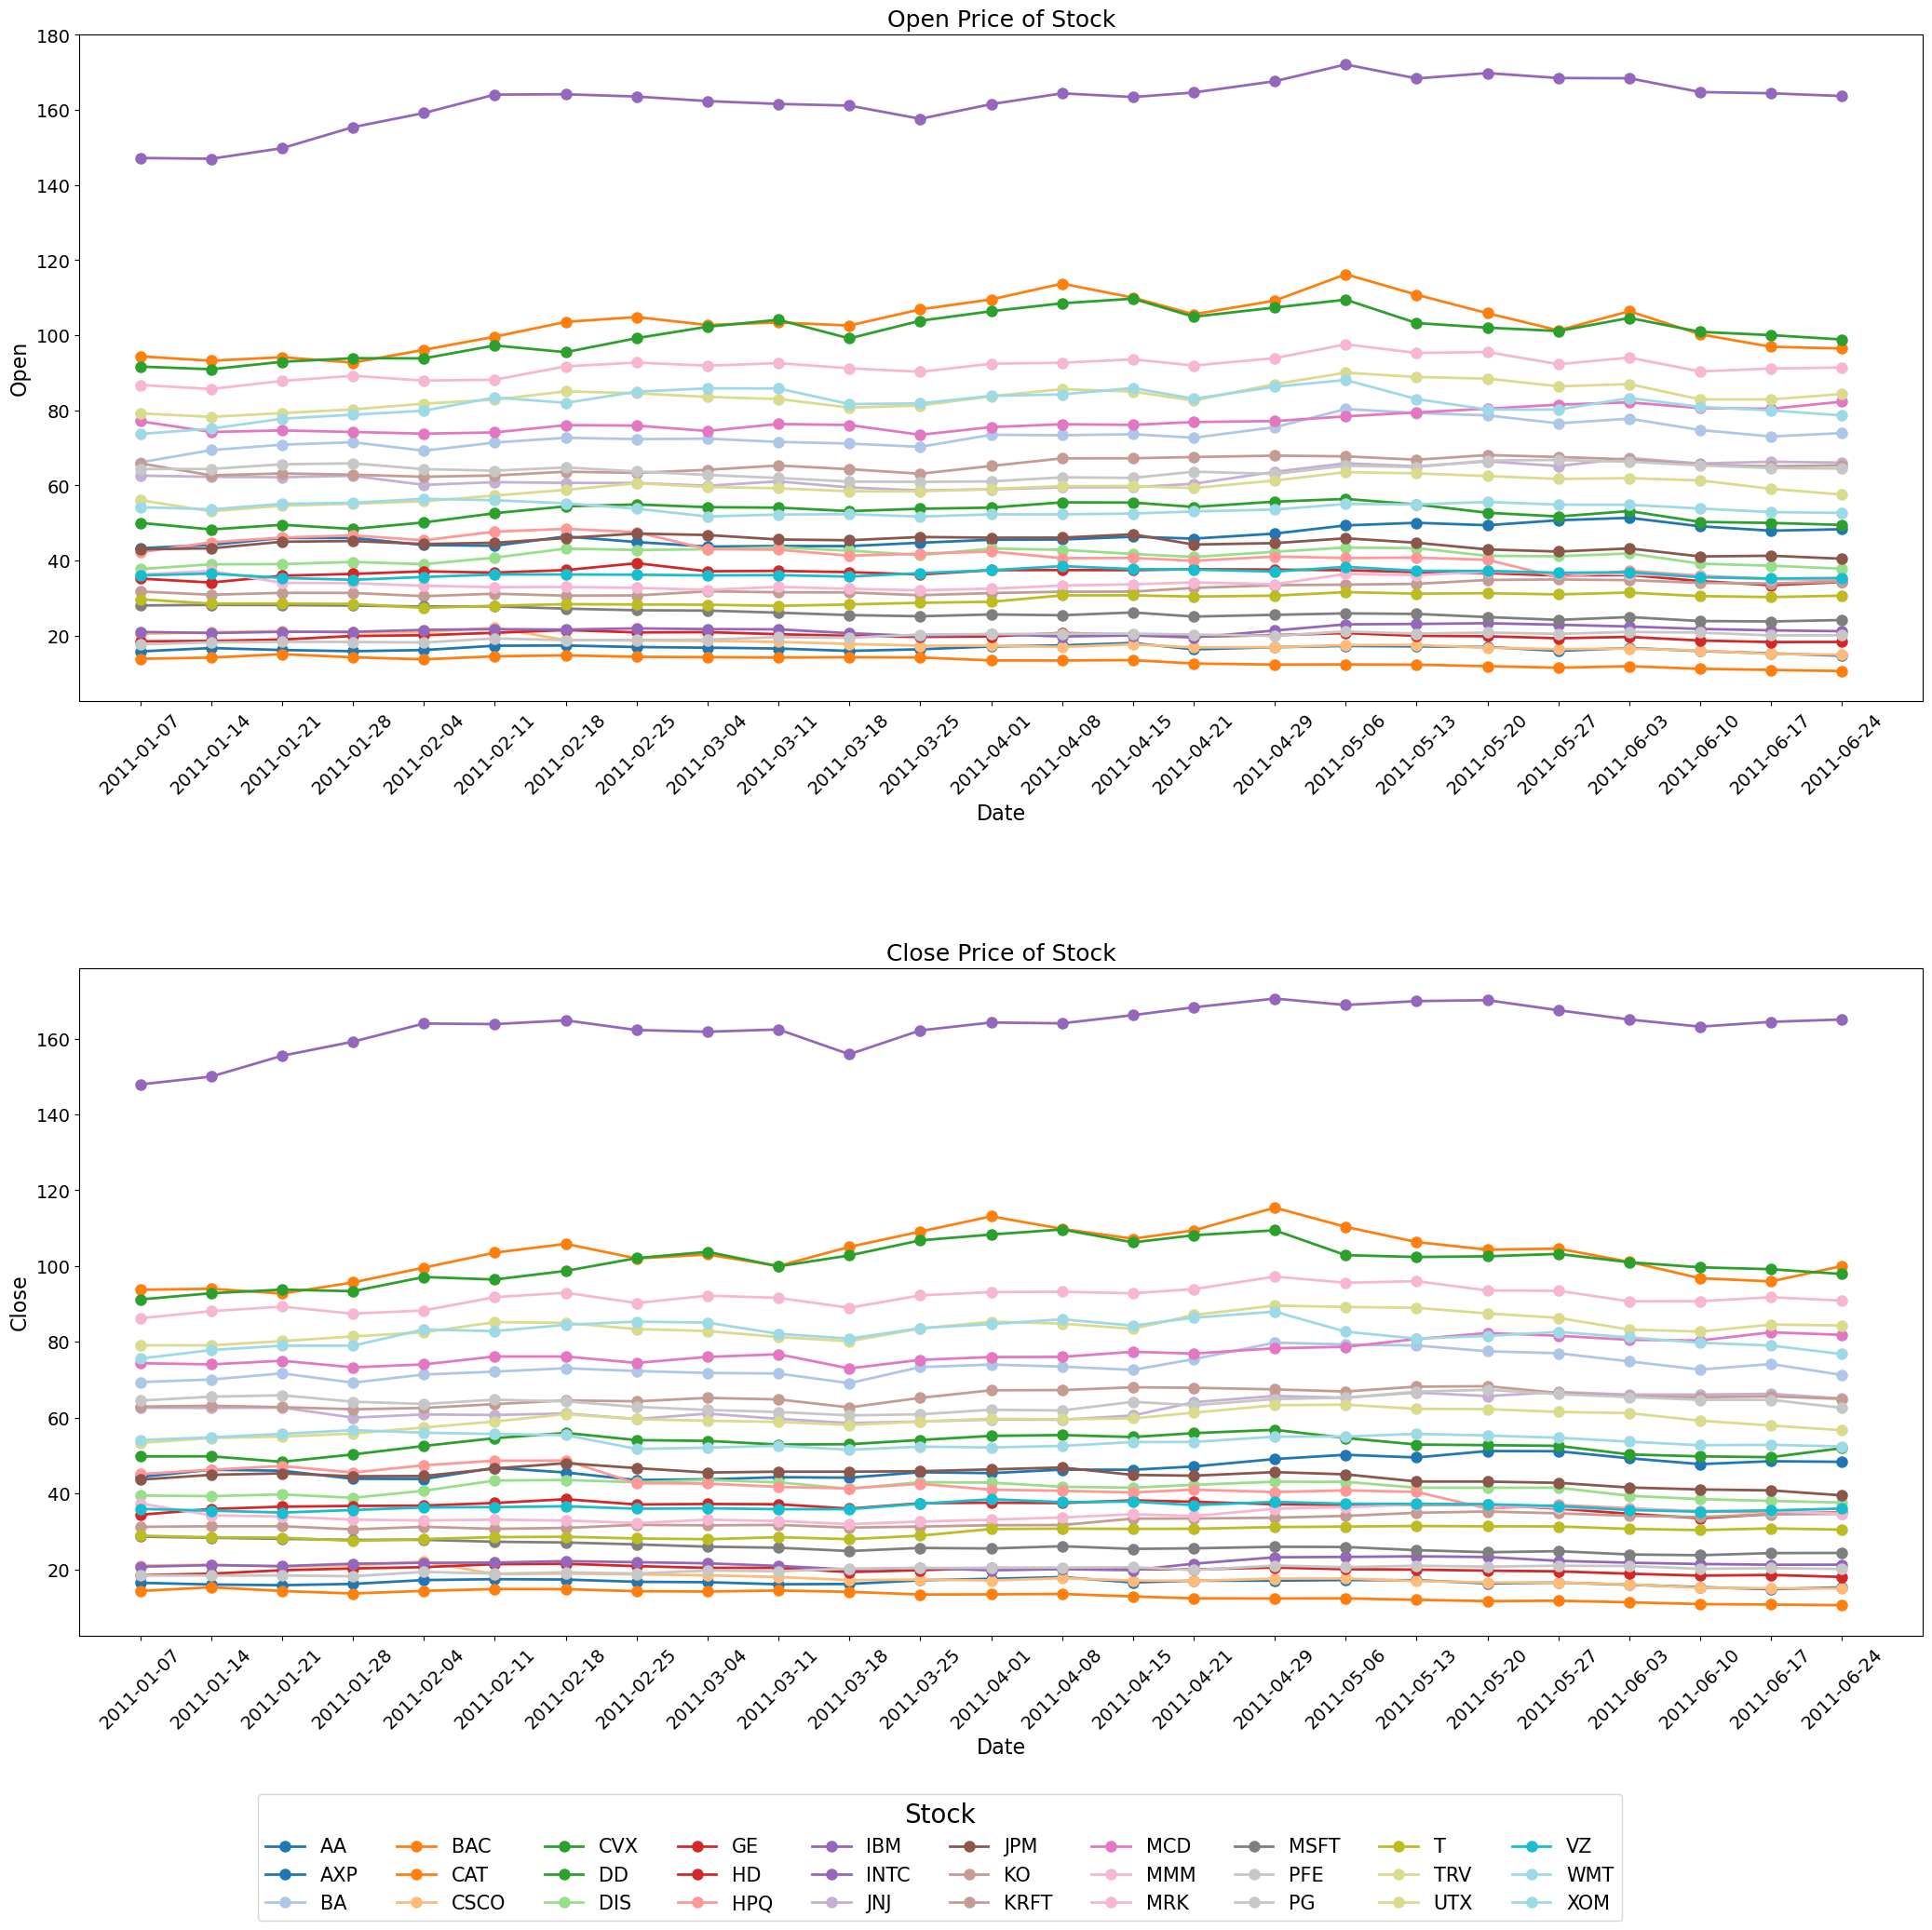

In [3]:
import matplotlib.dates as mdates

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))

for stock in unique_stocks:
    stock_data = dow_jones_index.data.features[
        dow_jones_index.data.features["stock"] == stock
    ]

    ax1.plot(
        stock_data["date"],
        stock_data["open"],
        marker="o",
        label=stock,
        color=color_dict[stock],
    )

    ax2.plot(
        stock_data["date"],
        stock_data["close"],
        marker="o",
        label=stock,
        color=color_dict[stock],
    )

ax1.set_xlabel("Date", fontsize=16)
ax1.set_ylabel("Open", fontsize=16)
ax1.set_title("Open Price of Stock", fontsize=18)
ax1.set_xlim(start_limit, end_limit)
ax1.set_xticks(ticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.tick_params(axis="x", rotation=45)

ax2.set_xlabel("Date", fontsize=16)
ax2.set_ylabel("Close", fontsize=16)
ax2.set_title("Close Price of Stock", fontsize=18)
ax2.set_xlim(start_limit, end_limit)
ax2.set_xticks(ticks)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.tick_params(axis="x", rotation=45)

# add public legend
handles, labels = ax1.get_legend_handles_labels()
max_columns = 10
ncol = min(max_columns, len(unique_stocks))

fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.01),
    ncol=ncol,
    fontsize=15,
    title="Stock",
    title_fontsize=20,
)

plt.subplots_adjust(left=0.08, right=0.98, top=0.93, bottom=0.07, hspace=0.4)

plt.show()


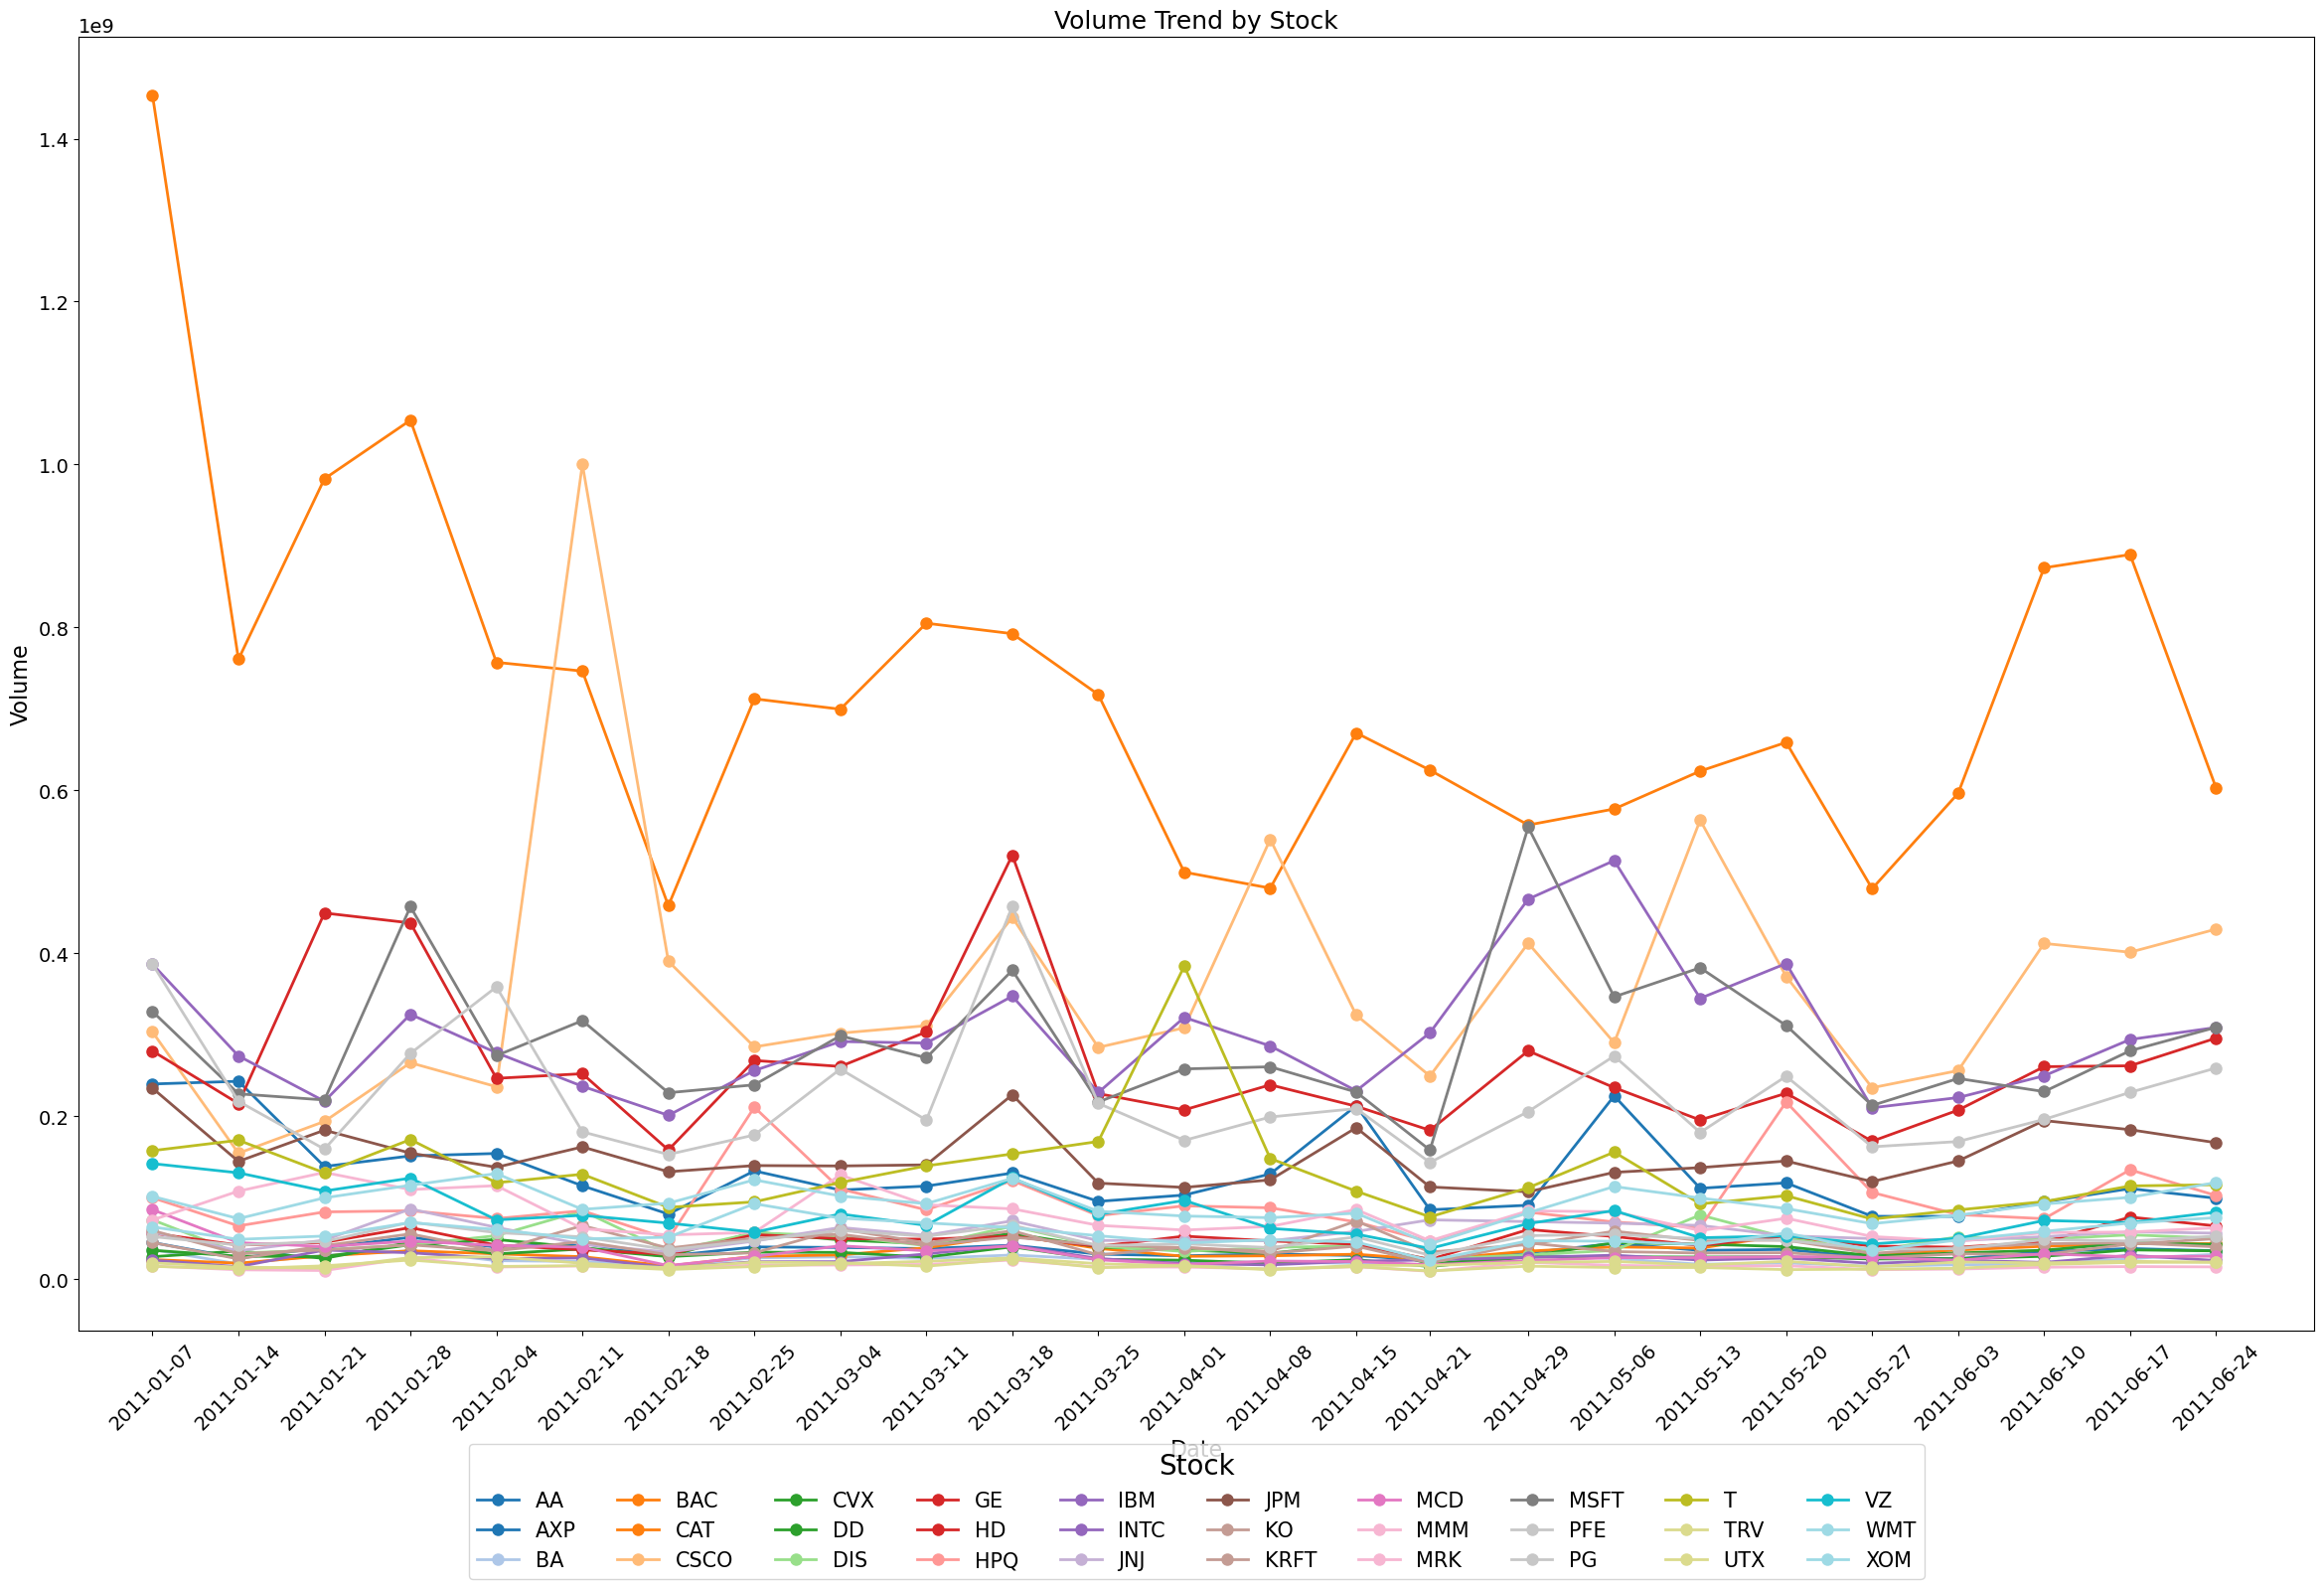

In [4]:
fig, ax1 = plt.subplots(figsize=(25, 14))

start_limit = pd.to_datetime("2011-01-01")
end_limit = pd.to_datetime("2011-07-02")
unique_dates = np.array(sorted(dow_jones_index.data.features["date"].unique()))
ticks = unique_dates[(unique_dates >= start_limit) & (unique_dates <= end_limit)]
ticks = pd.to_datetime(ticks).to_pydatetime().tolist()

for stock in unique_stocks:
    stock_data = dow_jones_index.data.features[
        dow_jones_index.data.features["stock"] == stock
    ]
    ax1.plot(
        stock_data["date"],
        stock_data["volume"],
        marker="o",
        label=stock,
        color=color_dict[stock],
    )

ax1.set_xlabel("Date", fontsize=16)
ax1.set_ylabel("Volume", fontsize=16)
ax1.set_title("Volume Trend by Stock", fontsize=18)
ax1.set_xlim(start_limit, end_limit)
ax1.set_xticks(ticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.tick_params(axis="x", rotation=45)

max_columns = 10
ncol = min(max_columns, len(unique_stocks))
ax1.legend(
    title="Stock",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.08),
    ncol=ncol,
    fontsize=15,
    title_fontsize=20,
)

plt.subplots_adjust(left=0.08, right=0.98, top=0.93, bottom=0)
plt.show()


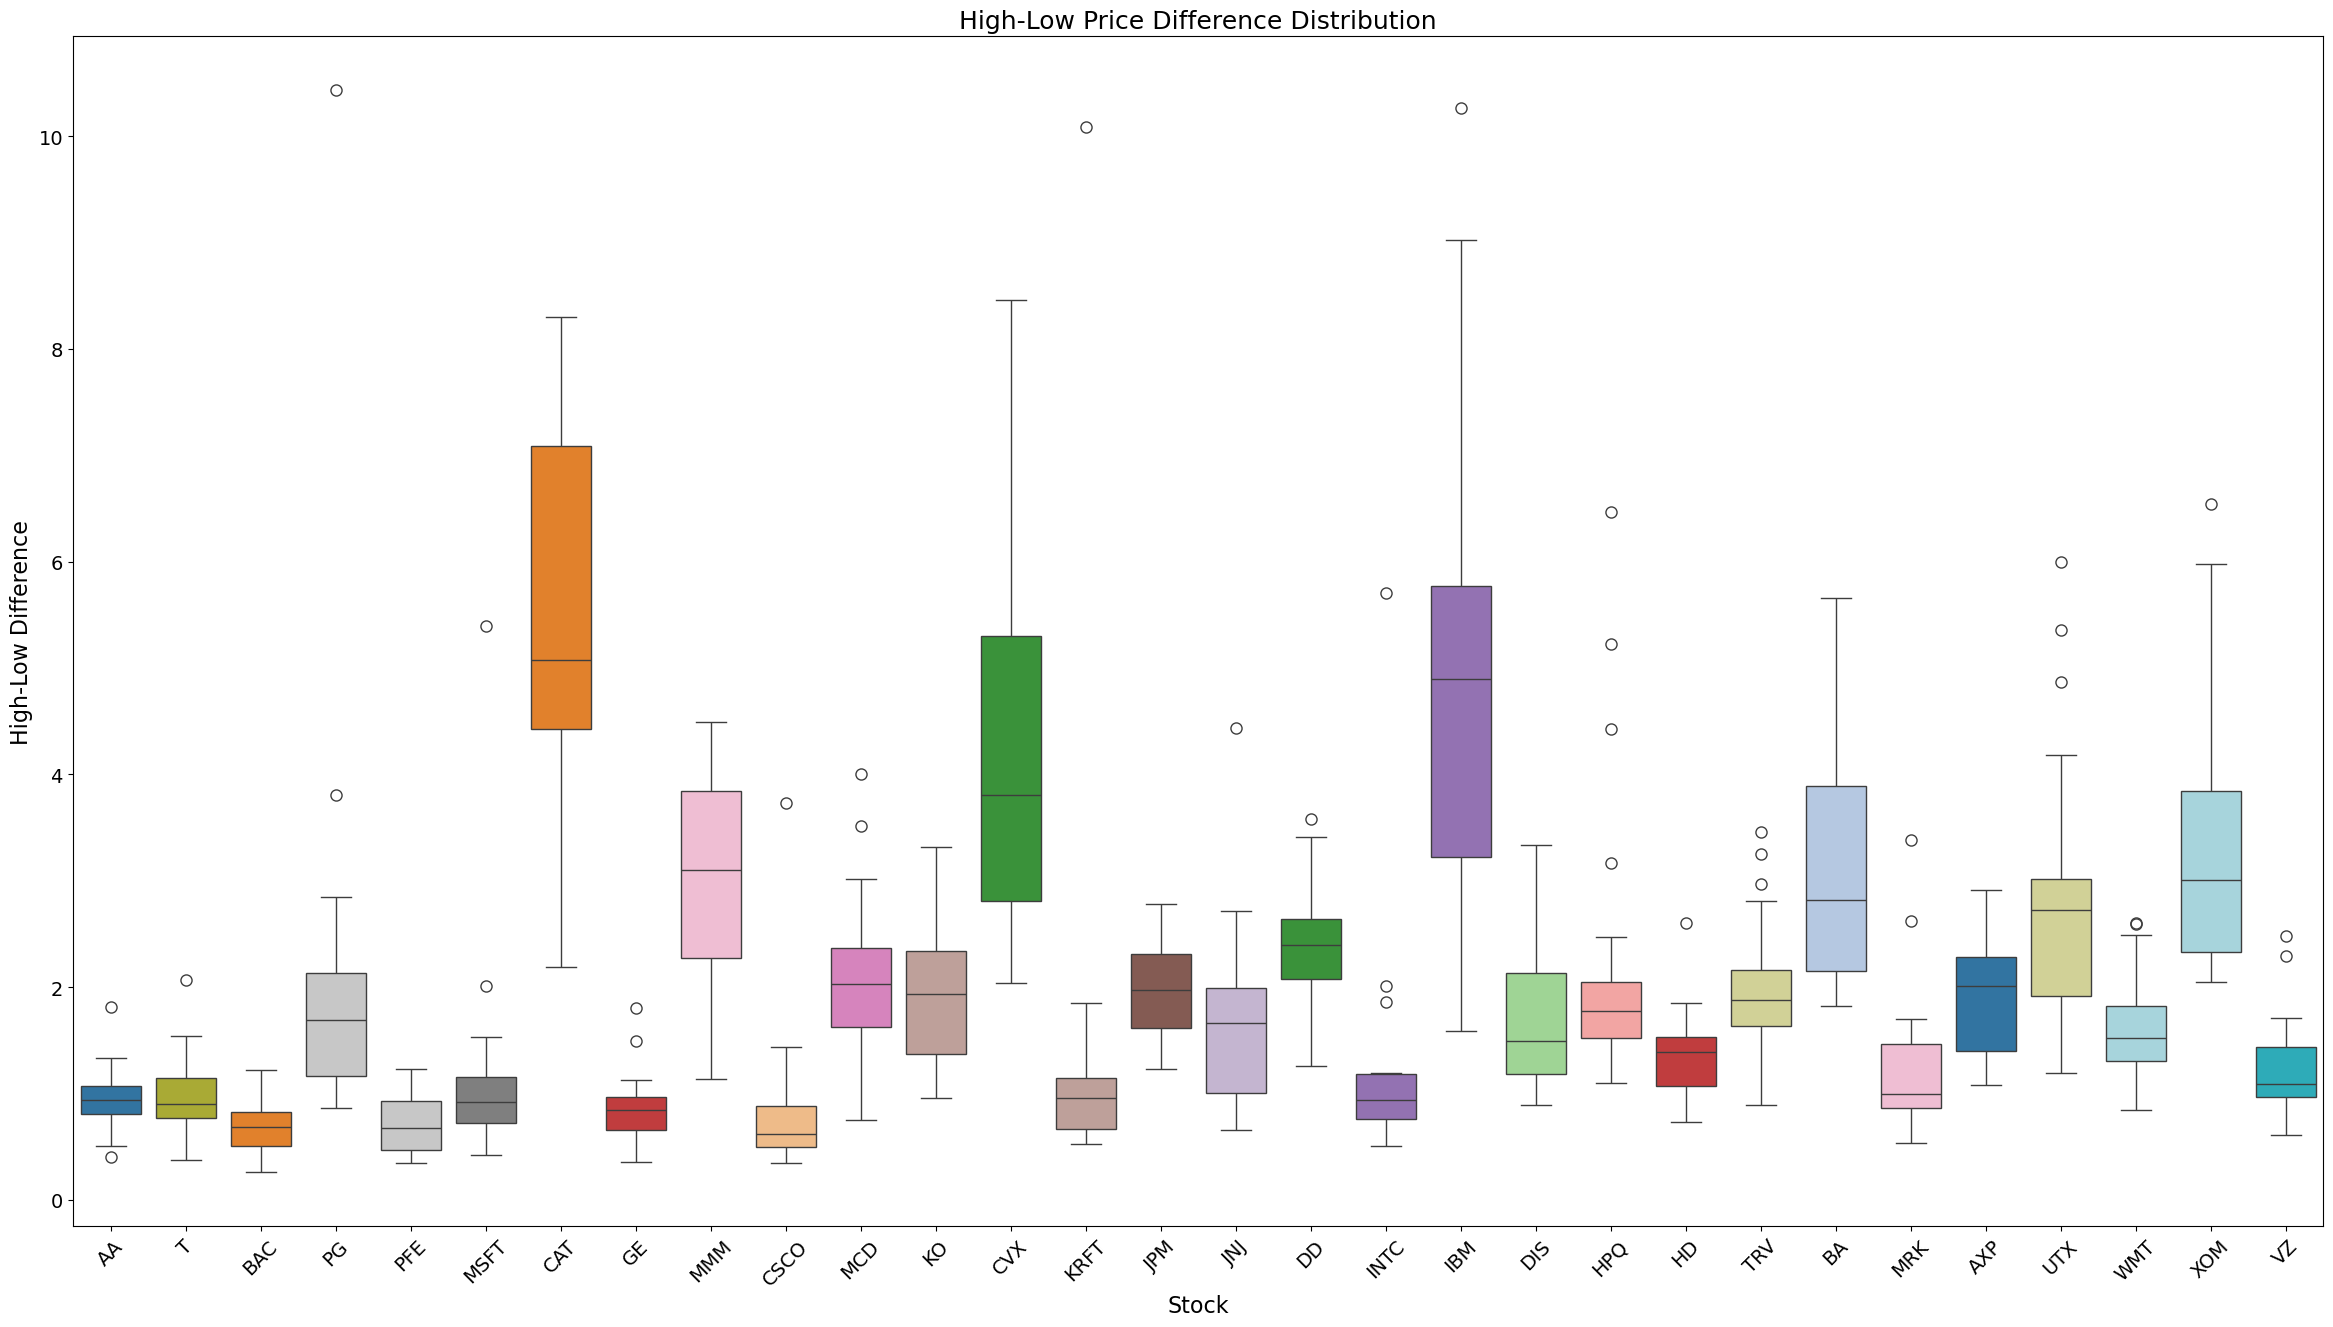

In [5]:
import seaborn as sns

dow_jones_index.data.features["high_low_diff"] = (
    dow_jones_index.data.features["high"] - dow_jones_index.data.features["low"]
)

fig, ax = plt.subplots(figsize=(25, 14))

sns.boxplot(
    x="stock",
    y="high_low_diff",
    hue="stock",
    data=dow_jones_index.data.features,
    palette=color_dict,
    ax=ax,
)

ax.set_title("High-Low Price Difference Distribution", fontsize=18)
ax.set_xlabel("Stock", fontsize=16)
ax.set_ylabel("High-Low Difference", fontsize=16)

plt.xticks(rotation=45)

plt.subplots_adjust(left=0.08, right=0.98, top=0.93, bottom=0.08)

plt.show()


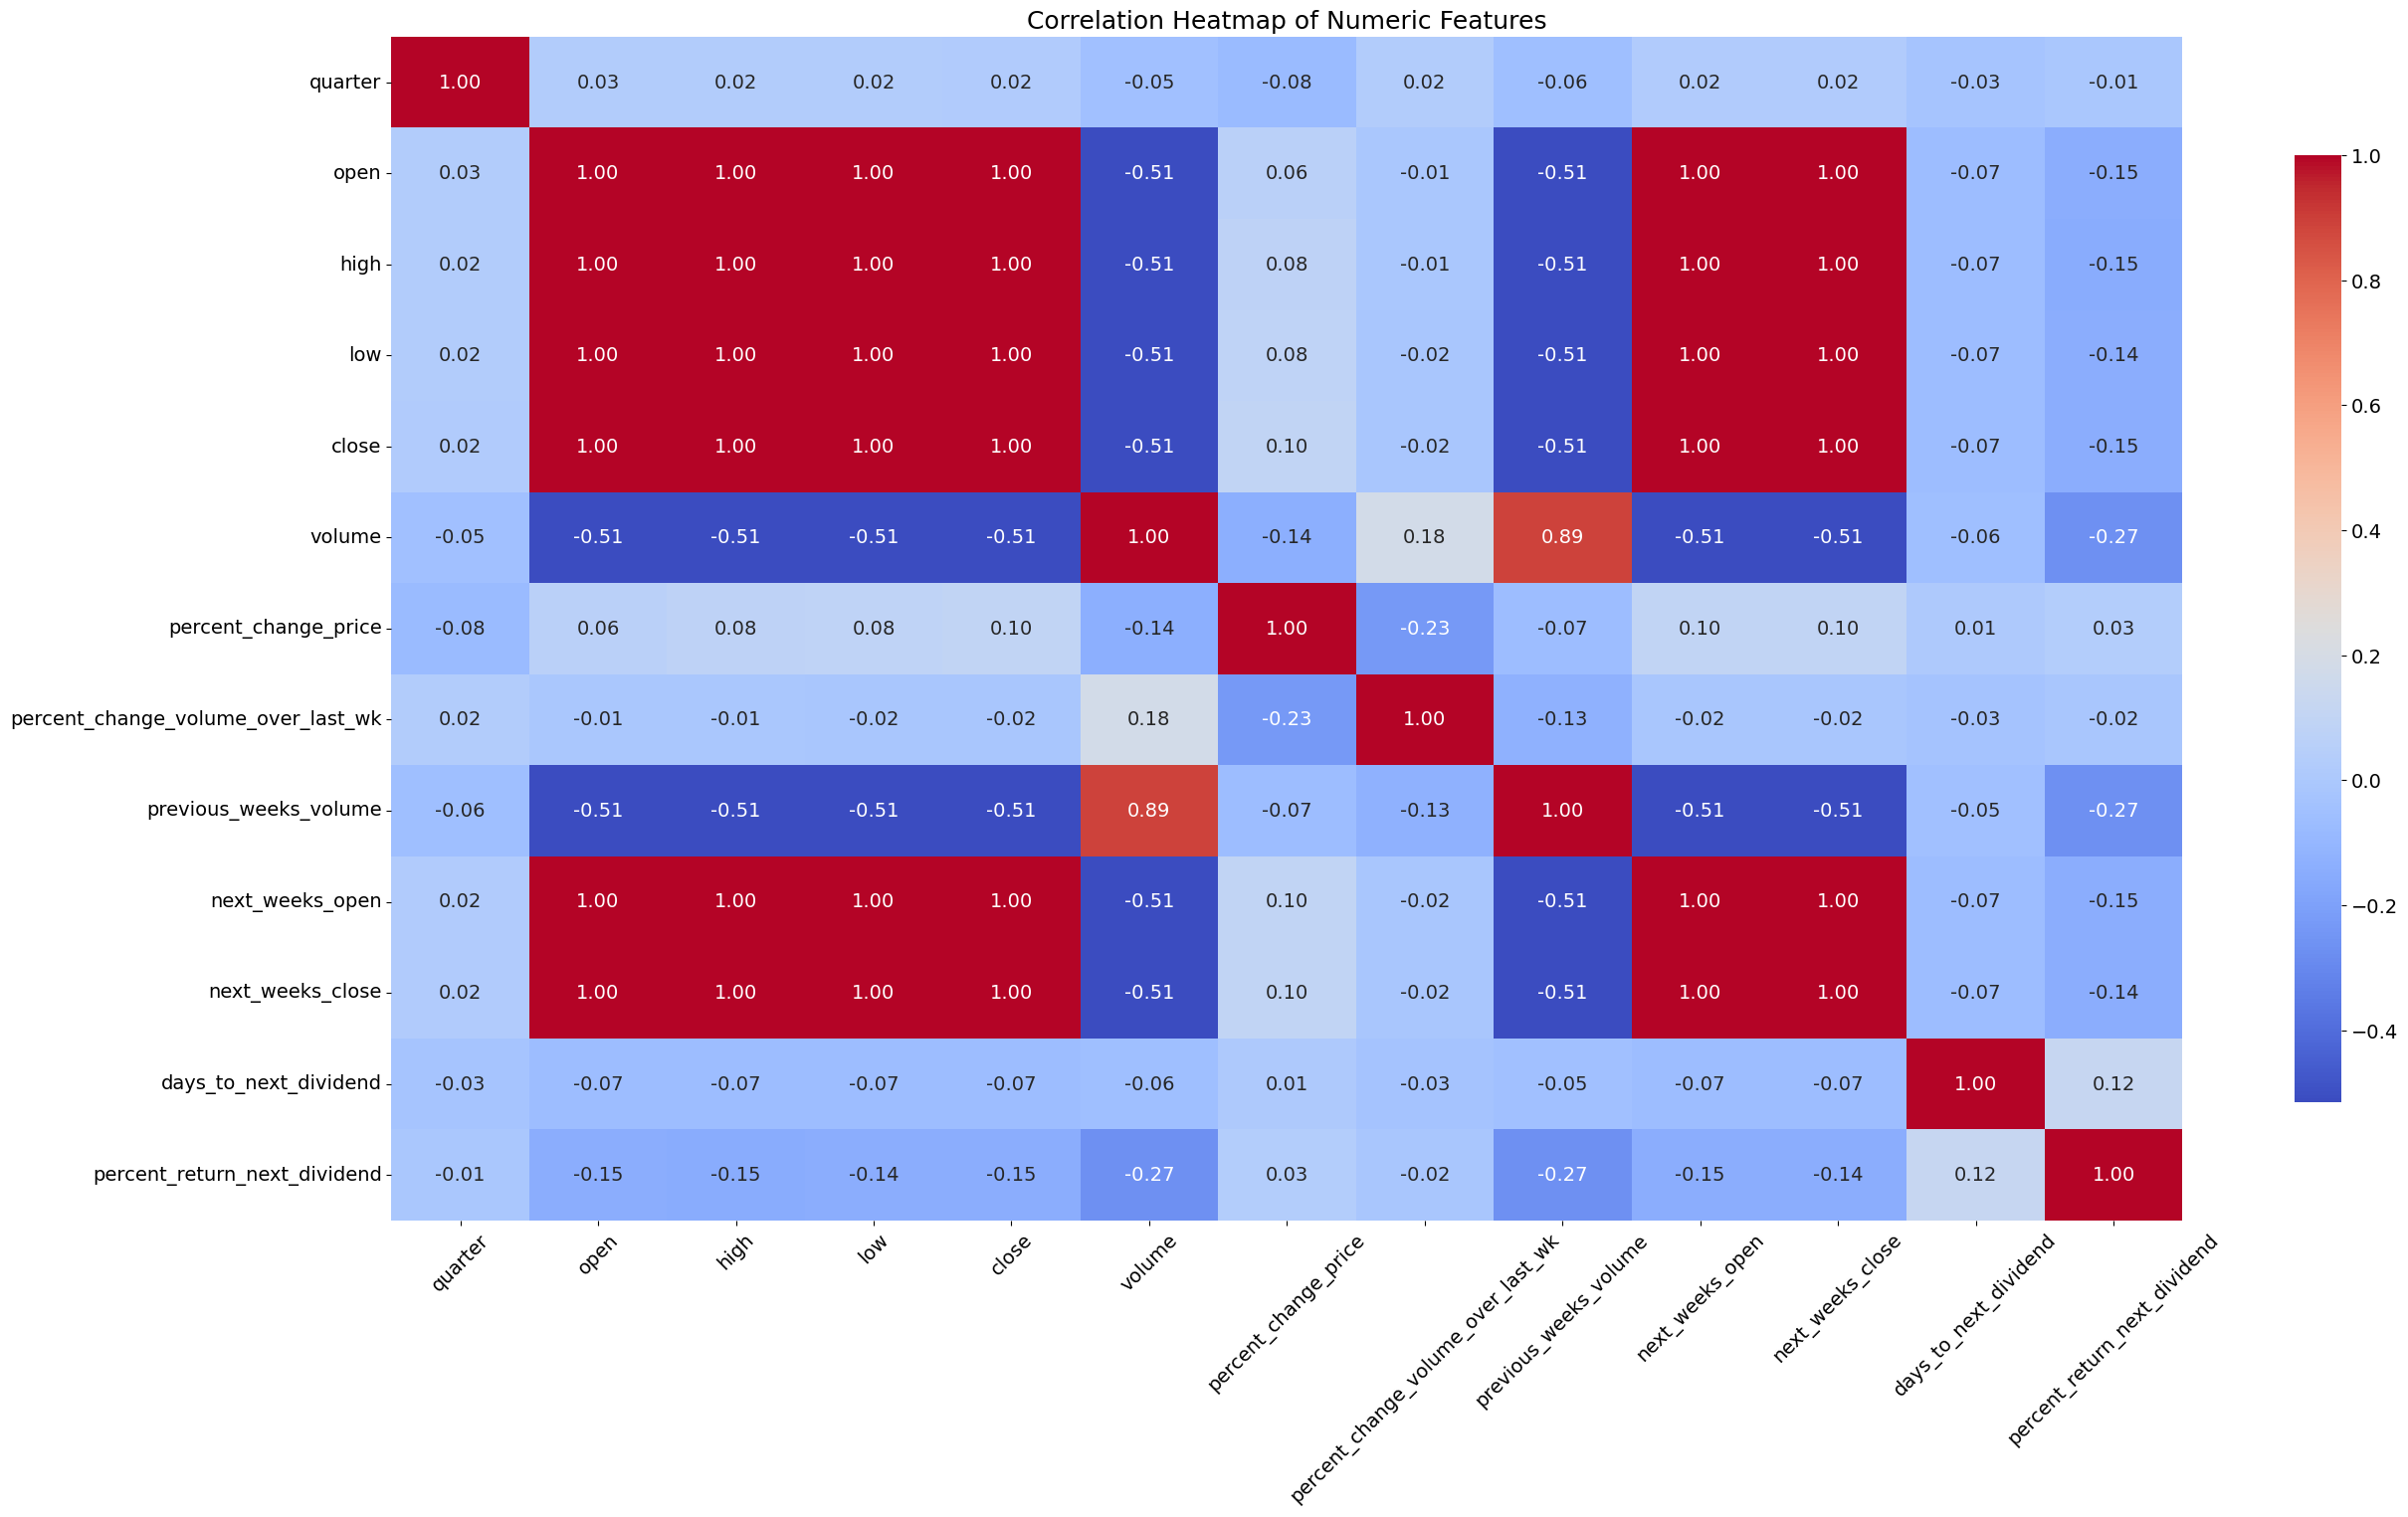

In [6]:
X1 = dow_jones_index.data.features.drop(columns=["quarter"])
X1 = dow_jones_index.data.features.drop(columns=["high_low_diff"])

numeric_cols = X1.select_dtypes(include=[np.number]).columns
corr_matrix = X1[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(25, 14))

heatmap = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8}, ax=ax
)

ax.set_title("Correlation Heatmap of Numeric Features", fontsize=18)

plt.xticks(rotation=45)

plt.subplots_adjust(left=0.08, right=0.98, top=0.93, bottom=0.08)

plt.show()


## <font color=Blue>**Regression Task**</font>

In [7]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date'])
# Remove irrelevant char
for c in ['open', 'high', 'low', 'close', 'volume']:
    if c in df.columns:
        df[c] = df[c].replace('[\$,]', '', regex=True).astype(float)
        
# Missing value
df['percent_change_volume_over_last_wk'] = df['percent_change_volume_over_last_wk'].fillna(0)
df['previous_weeks_volume'] = df['previous_weeks_volume'].fillna(0)


### Feature Enginnerring
- Constructing technical indicators that often use in analysing stock market

In [9]:
import talib


def dividend_category(days):
    if days <= 7:
        return -1
    elif days <= 30:
        return 0
    else:
        return 1


def generate_features(df):
    df = df.copy()

    def construct_and_fill(group):
        group = group.copy()

        # ===== Construct technical indicators =====
        group["ema_3"] = talib.EMA(group["close"], timeperiod=3)
        group["ema_5"] = talib.EMA(group["close"], timeperiod=5)
        group["ema_10"] = talib.EMA(group["close"], timeperiod=10)
        group["ema_diff_5_10"] = group["ema_5"] - group["ema_10"]
        group["ema_diff"] = group["ema_3"] - group["ema_5"]
        group["rsi_7"] = talib.RSI(group["close"], timeperiod=7)
        group["rsi_14"] = talib.RSI(group["close"], timeperiod=14)
        group["atr_7"] = talib.ATR(
            group["high"], group["low"], group["close"], timeperiod=7
        )
        macd, macdsignal, macdhist = talib.MACD(
            group["close"], fastperiod=6, slowperiod=13, signalperiod=5
        )
        group["macd"] = macd
        group["macd_signal"] = macdsignal
        group["macd_hist"] = macdhist
        group["momentum_3"] = group["close"].pct_change(periods=3)
        group["momentum_5"] = group["close"].pct_change(periods=5)
        group["momentum_diff"] = group["momentum_3"] - group["momentum_5"]
        group["roc_4"] = talib.ROC(group["close"], timeperiod=4)
        group["volatility_5"] = group["percent_change_price"].rolling(5).std()
        group["volatility_3"] = group["percent_change_price"].rolling(3).std()
        group["volatility_diff"] = group["volatility_3"] - group["volatility_5"]
        group["vpt"] = (group["percent_change_price"] * group["volume"]).cumsum()
        group["price_volume_ratio"] = group["percent_change_price"] / (
            group["percent_change_volume_over_last_wk"] + 1e-6
        )
        group["price_volume_ratio"] = group["price_volume_ratio"].clip(-10, 10)
        group["is_month_end_week"] = (
            group["date"].dt.month != group["date"].shift(-1).dt.month
        ).astype(int)
        group["dividend_timing"] = group["days_to_next_dividend"].apply(
            dividend_category
        )
        group["return_t-3"] = group["percent_change_price"].shift(3)
        group["return_t-5"] = group["percent_change_price"].shift(5)

        # ===== Fill missing values =====
        indicator_cols = [
            "ema_3",
            "ema_5",
            "ema_diff",
            "ema_10",
            "ema_diff_5_10",
            "rsi_7",
            "rsi_14",
            "atr_7",
            "momentum_diff",
            "volatility_3",
            "macd",
            "macd_signal",
            "macd_hist",
            "volatility_diff",
            "momentum_3",
            "momentum_5",
            "roc_4",
            "volatility_5",
            "vpt",
            "price_volume_ratio",
            "return_t-3",
            "return_t-5",
        ]

        # Remove Feature
        del group["previous_weeks_volume"]
        del group["quarter"]
        del group["days_to_next_dividend"]

        # Step 1: Forward fill only from first valid index
        for col in indicator_cols:
            first_valid = group[col].first_valid_index()
            if first_valid:
                group.loc[first_valid:, col] = group.loc[first_valid:, col].ffill()

        # Step 2: Use expanding mean (no leakage)
        for col in indicator_cols:
            group[col] = group[col].fillna(group[col].expanding().mean())

        # Step 3: Optional 0 fill only for specific types like momentum
        for col in ["momentum_3", "momentum_5"]:
            group[f"{col}_missing"] = group[col].isna().astype(int)
            group[col] = group[col].fillna(0)

        # Step 4: Final hard fill (if needed)
        group[indicator_cols] = group[indicator_cols].fillna(0)

        return group

    # Apply by stock
    df = df.groupby("stock").apply(construct_and_fill).reset_index(drop=True)

    return df


# df is original dataset which contains every data and attributes
df_features = generate_features(df)
df_features.describe()


,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,percent_return_next_dividend,percent_change_next_weeks_price,...,volatility_3,volatility_diff,vpt,price_volume_ratio,is_month_end_week,dividend_timing,return_t-3,return_t-5,momentum_3_missing,momentum_5_missing
count,750,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2011-03-31 23:02:24,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.369881,0.691826,0.238468,...,1.966363,-0.124928,-2.767242e+08,-0.030814,0.240000,0.597333,0.121931,0.221446,0.120000,0.200000
min,2011-01-07 00:00:00,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,0.065574,-15.422900,...,0.000000,-7.140363,-2.104255e+10,-10.000000,0.000000,-1.000000,-15.422900,-15.422900,0.000000,0.000000
25%,2011-02-18 00:00:00,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-18.890959,0.534549,-1.222068,...,0.993634,-0.421089,-1.635392e+08,-0.098599,0.000000,0.000000,-0.991257,-0.720572,0.000000,0.000000
50%,2011-04-01 00:00:00,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.000000,0.681067,0.101193,...,1.786193,0.000000,1.180512e+08,-0.017871,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2011-05-13 00:00:00,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,19.984489,0.854291,1.845562,...,2.689602,0.390414,4.811224e+08,0.049099,0.000000,1.000000,1.560717,1.464862,0.000000,0.000000
max,2011-06-24 00:00:00,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.564210,9.882230,...,10.856143,2.988895,9.997316e+09,10.000000,1.000000,1.000000,9.882230,9.882230,1.000000,1.000000
std,NaN,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,39.738369,0.305482,2.679538,...,1.424483,0.873519,3.354844e+09,2.188750,0.427368,0.639587,2.424496,2.285493,0.325178,0.400267


### Analyse `percent_change_price` distribution to decide the threshold
- It's a foundation for data analayst or manager to decide how to set threshold
- Here we decide to use 25% and 75% as our threshold, hence constructing bondary of BUY,HOLD and SELL signal

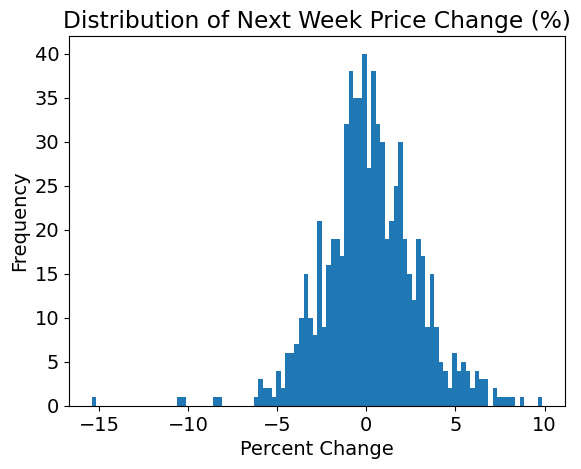

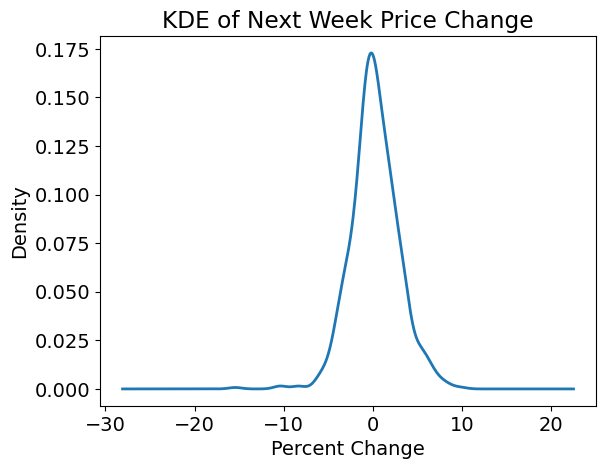

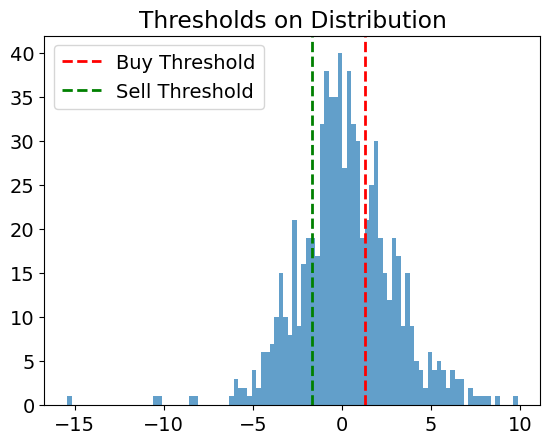

In [10]:
df_features["percent_change_price"].describe()
plt.hist(df_features["percent_change_next_weeks_price"], bins=100)
plt.title("Distribution of Next Week Price Change (%)")
plt.xlabel("Percent Change")
plt.ylabel("Frequency")
plt.show()

df["percent_change_next_weeks_price"].plot(kind="kde")
plt.title("KDE of Next Week Price Change")
plt.xlabel("Percent Change")
plt.show()


threshold_up = 1.28
threshold_down = -1.65

plt.hist(df["percent_change_next_weeks_price"], bins=100, alpha=0.7)
plt.axvline(threshold_up, color="red", linestyle="--", label="Buy Threshold")
plt.axvline(threshold_down, color="green", linestyle="--", label="Sell Threshold")
plt.legend()
plt.title("Thresholds on Distribution")
plt.show()


### Model Training

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


class BaseSignalModel:
    def __init__(
        self,
        model,
        feature_cols=None,
        threshold=2,
        name=None,
        risk_free_rate=0.02,
        train_ratio=0.8,
    ):
        self.model = model
        self.name = name or model.__class__.__name__
        self.scaler = StandardScaler()
        self.threshold = threshold
        self.feature_cols = feature_cols
        self.risk_free_rate = risk_free_rate
        self.metrics = {}
        self.support_cv = True
        self.train_ratio = train_ratio

    def fit(self, df, cv_splits=None):
        df = df.copy()

        if self.feature_cols is None:
            self.feature_cols = [
                col
                for col in df.columns
                if col
                not in [
                    "stock",
                    "date",
                    "percent_change_next_weeks_price",
                    "next_weeks_open",
                    "next_weeks_close",
                ]
            ]

        df = df.sort_values(by=["stock", "date"]).reset_index(drop=True)

        train_list = []
        test_list = []

        for stock in df["stock"].unique():
            stock_data = df[df["stock"] == stock]
            n_train = int(len(stock_data) * self.train_ratio)
            train_data = stock_data.iloc[:n_train]
            test_data = stock_data.iloc[n_train:]
            train_list.append(train_data)
            test_list.append(test_data)

        train_df = pd.concat(train_list).reset_index(drop=True)
        test_df = pd.concat(test_list).reset_index(drop=True)

        X_train = train_df[self.feature_cols]
        y_train = train_df["percent_change_next_weeks_price"]

        X_test = test_df[self.feature_cols]
        y_test = test_df["percent_change_next_weeks_price"]

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Cross validation
        if cv_splits is not None and cv_splits >= 2:
            tscv = TimeSeriesSplit(n_splits=cv_splits)

            cv_rmse = []
            cv_mae = []
            cv_r2 = []
            cv_direction_acc = []

            for train_index, val_index in tscv.split(X_train_scaled):
                X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
                y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

                model_clone = self._clone_model()
                model_clone.fit(X_tr, y_tr)
                y_val_pred = model_clone.predict(X_val)

                cv_rmse.append(root_mean_squared_error(y_val, y_val_pred))
                cv_mae.append(mean_absolute_error(y_val, y_val_pred))
                cv_r2.append(r2_score(y_val, y_val_pred))

                pred_direction = np.where(
                    y_val_pred > self.threshold,
                    1,
                    np.where(y_val_pred < -self.threshold, -1, 0),
                )
                true_direction = np.where(
                    y_val > self.threshold, 1, np.where(y_val < -self.threshold, -1, 0)
                )
                self.metrics["Direction_Accuracy"] = np.mean(
                    pred_direction == true_direction
                )
                cv_direction_acc.append(np.mean(pred_direction == true_direction))

            self.metrics["CV_RMSE"] = np.mean(cv_rmse)
            self.metrics["CV_MAE"] = np.mean(cv_mae)
            self.metrics["CV_R2"] = np.mean(cv_r2)
            self.metrics["CV_Direction_Accuracy"] = np.mean(cv_direction_acc)

        self.model.fit(X_train_scaled, y_train)
        y_pred = self.model.predict(X_test_scaled)

        self.metrics["RMSE"] = root_mean_squared_error(y_test, y_pred)
        self.metrics["MAE"] = mean_absolute_error(y_test, y_pred)
        self.metrics["R2"] = r2_score(y_test, y_pred)

        self.metrics["Direction_Accuracy"] = self.direction_accuracy(
            y_pred, y_test, self.threshold
        )

    def direction_accuracy(self, y_pred, y_test, threshold):
        pred_direction = np.where(
            y_pred > threshold, 1, np.where(y_pred < -threshold, -1, 0)
        )
        true_direction = np.where(
            y_test > threshold, 1, np.where(y_test < -threshold, -1, 0)
        )
        return np.mean(pred_direction == true_direction)

    def _clone_model(self):
        from sklearn.base import clone

        return clone(self.model)

    def predict(self, df):
        df = df.copy()
        X_scaled = self.scaler.transform(df[self.feature_cols])
        df["predicted_return"] = self.model.predict(X_scaled)
        return df

    def generate_signal(self, df, threshold=None):
        threshold = threshold if threshold is not None else self.threshold
        df = df.copy()
        df["signal"] = 0
        df.loc[df["predicted_return"] > threshold, "signal"] = 1
        df.loc[df["predicted_return"] < -threshold, "signal"] = -1
        return df

    def backtest(self, df):
        df = df.copy()
        df["percent_change_next_weeks_price"] = (
            df["percent_change_next_weeks_price"] / 100
        )
        df["strategy_return"] = df["signal"] * df["percent_change_next_weeks_price"]
        df["cumulative_strategy_return"] = (1 + df["strategy_return"]).cumprod()
        df["cumulative_market_return"] = (
            1 + df["percent_change_next_weeks_price"]
        ).cumprod()

        returns = df["strategy_return"]
        periods_per_year = 52  # weekly

        cagr = (df["cumulative_strategy_return"].iloc[-1]) ** (
            1 / (len(df) / periods_per_year)
        ) - 1
        max_drawdown = self._calculate_max_drawdown(df["cumulative_strategy_return"])
        sharpe = (returns.mean() * periods_per_year - self.risk_free_rate) / (
            returns.std() * np.sqrt(periods_per_year)
        )

        self.metrics["CAGR"] = cagr
        self.metrics["Max_Drawdown"] = max_drawdown
        self.metrics["Sharpe_Ratio"] = sharpe
        return df

    @staticmethod
    def _calculate_max_drawdown(cumulative_returns):
        peak = cumulative_returns.expanding(min_periods=1).max()
        drawdown = (cumulative_returns - peak) / peak
        max_drawdown = drawdown.min()
        return max_drawdown


In [12]:
class BaselineModel:
    def __init__(self, mode="naive", name=None, threshold=2):
        assert mode in ["naive", "zero"], "the model either be'naive' or 'zero'"
        self.mode = mode
        self.name = name or f"Baseline-{mode.capitalize()}"
        self.metrics = {}
        self.threshold = threshold

    def fit(self, df):
        df = df.copy()
        self.df_train = df

    def predict(self, df):
        df = df.copy()
        # Use current week data to predict next week, which means gussing
        if self.mode == "naive":
            df["predicted_return"] = df["percent_change_price"]
        # Always predict 0
        elif self.mode == "zero":
            df["predicted_return"] = 0.0
        return df

    def generate_signal(self, df):
        df = df.copy()
        df["signal"] = 0
        df.loc[df["predicted_return"] > self.threshold, "signal"] = 1
        df.loc[df["predicted_return"] < -self.threshold, "signal"] = -1
        return df

    def evaluate(self, df):
        y_true = df["percent_change_next_weeks_price"]
        y_pred = df["predicted_return"]

        self.metrics["RMSE"] = root_mean_squared_error(y_true, y_pred)
        self.metrics["MAE"] = mean_absolute_error(y_true, y_pred)
        self.metrics["R2"] = r2_score(y_true, y_pred)
        # Direction Accuracy Test(signal:Buy,Sell,Hold)
        self.metrics["Direction_Accuracy"] = self.direction_accuracy(
            y_pred, y_true, self.threshold
        )

    def direction_accuracy(self, y_pred, y_test, threshold):
        pred_direction = np.where(
            y_pred > threshold, 1, np.where(y_pred < -threshold, -1, 0)
        )
        true_direction = np.where(
            y_test > threshold, 1, np.where(y_test < -threshold, -1, 0)
        )
        return np.mean(pred_direction == true_direction)

    def backtest(self, df):
        df = df.copy()
        df["percent_change_next_weeks_price"] = (
            df["percent_change_next_weeks_price"] / 100
        )
        df["strategy_return"] = df["signal"] * df["percent_change_next_weeks_price"]
        df["cumulative_strategy_return"] = (1 + df["strategy_return"]).cumprod()
        df["cumulative_market_return"] = (
            1 + df["percent_change_next_weeks_price"]
        ).cumprod()

        returns = df["strategy_return"]
        periods_per_year = 52

        cagr = (df["cumulative_strategy_return"].iloc[-1]) ** (
            1 / (len(df) / periods_per_year)
        ) - 1
        max_drawdown = self._calculate_max_drawdown(df["cumulative_strategy_return"])
        sharpe = (returns.mean() * periods_per_year - 0.02) / (
            returns.std() * np.sqrt(periods_per_year)
        ) + 1e-6

        self.metrics["CAGR"] = cagr
        self.metrics["Max_Drawdown"] = max_drawdown
        self.metrics["Sharpe_Ratio"] = sharpe

        return df

    @staticmethod
    def _calculate_max_drawdown(cumulative_returns):
        peak = cumulative_returns.expanding(min_periods=1).max()
        drawdown = (cumulative_returns - peak) / peak
        max_drawdown = drawdown.min()
        return max_drawdown


In [13]:
class Runner:
    def __init__(self, models, cv_splits=None):
        """
        models: dict, e.g., {"naive": BaselineModel(), "my_model": BaseSignalModel(model)}
        cv_splits: int or None, number of splits for TimeSeries CV
        """
        self.models = models
        self.results = {}
        self.cv_splits = cv_splits

    def run(self, df):
        """
        Train, test, generate signal, evaluate all models
        """
        for name, model in self.models.items():
            # model.fit(df, cv_splits=self.cv_splits)
            if getattr(model, "support_cv", False):
                model.fit(df, cv_splits=self.cv_splits)
            else:
                model.fit(df)

            df_pred = model.predict(df)
            df_pred = model.generate_signal(df_pred)

            if hasattr(model, "evaluate"):
                model.evaluate(df_pred)
            if hasattr(model, "backtest"):
                model.backtest(df_pred)

            self.results[name] = model.metrics

    def summary(self):
        """
        Compare all models
        """
        summary_df = pd.DataFrame(self.results).T
        summary_df = summary_df.sort_values(by="Sharpe_Ratio", ascending=False)
        return summary_df


### Run and Test
- **Model Chosen:** Random Forest Regressor,XGB Regressor, SVR
- **Baseline Model**: Naive Model, Zero Model
- **cv split**: 5

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

# 1. Feature Engineering
df_feat = generate_features(df)

# Baseline Models
naive_baseline = BaselineModel(mode="naive", threshold=1.2)
zero_baseline = BaselineModel(mode="zero", threshold=1.2)
# Models
rf_model = BaseSignalModel(
    RandomForestRegressor(n_estimators=60, max_depth=4, min_samples_leaf=3),
    threshold=1.2,
    train_ratio=0.7,
)
# ridge_model = BaseSignalModel(Ridge(alpha=60), threshold=1.2,train_ratio=0.55)
xgb_model = BaseSignalModel(
    XGBRegressor(n_estimators=30, max_depth=3, eta=0.05, alpha=10),
    threshold=1.2,
    train_ratio=0.7,
)
svr_model = BaseSignalModel(
    SVR(kernel="rbf", degree=4, epsilon=0.10, C=2), threshold=1.2, train_ratio=0.7
)

# 3. Add to runner
runner = Runner(
    models={
        "Naive": naive_baseline,
        "Zero": zero_baseline,
        "Random Forest": rf_model,
        #'Ridge': ridge_model,
        "XG Boost": xgb_model,
        "SVR": svr_model,
    },
    cv_splits=4,
)

# 4. Run all models
results = runner.run(df_feat)
summary_df = runner.summary()
# 5. Show summary
print(summary_df)


                   RMSE       MAE        R2  Direction_Accuracy      CAGR  \
SVR            2.959404  2.275728 -0.030193            0.375000  0.301893   
Random Forest  2.918262  2.270540 -0.001748            0.387500  0.177843   
XG Boost       2.885575  2.224332  0.020567            0.391667  0.133909   
Naive          3.642497  2.771956 -0.850367            0.346667 -0.015927   
Zero           2.688349  2.011663 -0.007931            0.417333  0.000000   

               Max_Drawdown  Sharpe_Ratio   CV_RMSE    CV_MAE     CV_R2  \
SVR               -0.053273      2.497023  2.204234  1.696925  0.062776   
Random Forest     -0.060400      1.471612  2.331018  1.814647 -0.040068   
XG Boost          -0.042553      1.190523  2.260262  1.749429  0.018926   
Naive             -0.481070     -0.167164       NaN       NaN       NaN   
Zero               0.000000          -inf       NaN       NaN       NaN   

               CV_Direction_Accuracy  
SVR                         0.497549  
Random F

## Classification Task

### Data Preprocessing - Classification

In [15]:
from pathlib import Path
import numpy as np
import pandas as pd
import talib


def _zscore(series: pd.Series, window: int) -> pd.Series:
    return (series - series.rolling(window).mean()) / (
        series.rolling(window).std(ddof=0) + 1e-6
    )


def _safe_div(a: pd.Series, b: pd.Series) -> pd.Series:
    b = b.replace(0, np.nan)
    return a / b


WINS = [8]

FEATURES = [
    "open",
    "high",
    "low",
    "close",
    "volume",
    "pct_change_price",
    "percent_change_volume_over_last_wk",
    "sma_3",
    "sma_5",
    "ema_3",
    "ema_5",
    "price_ma5_deviation",
    "rsi_3",
    "rsi_5",
    "macd_hist_3_7_3",
    "momentum_5",
    "roc_5",
    "atr_3",
    "atr_5",
    "atr_7",
    "atr_chg_7_3",
    "volatility_5",
    "ln_high_low_ratio",
    "vol_change",
    "volume_z_5",
    "price_volume_ratio",
    "vpt",
    "close_z_5",
    "support3w_distance",
    "cumulative_return_5w",
    "max_drawdown_5w",
    "bollinger_band_width_5w",
    "stochastic_k_5w",
    "stochastic_d_5w",
]
TIME_FEATURES = ["is_month_end", "week_of_month", "month", "quarter"]


def make_sliding_allow_incomplete(
    df_feat: pd.DataFrame, feature_cols, win: int = 8, horizon: int = 1, step: int = 1
) -> pd.DataFrame:
    samples = []
    for stock, group in df_feat.groupby("stock", sort=False):
        group = group.reset_index(drop=True)
        n = len(group)
        max_start = n - horizon
        if max_start <= 0:
            continue
        for start in range(0, max_start, step):
            end = min(start + win, n)
            window = group.iloc[start:end]
            target = group.iloc[min(start + win + horizon - 1, n - 1)]
            rec = target[feature_cols].to_dict()
            rec.update(
                {
                    "win_close_mean": window["close"].mean(),
                    "win_close_std": window["close"].std(ddof=0),
                    "win_pctchg_sum": window["pct_change_price"].sum(),
                    "win_volatility": window["pct_change_price"].std(ddof=0),
                    "win_rsi_mean": window["rsi_3"].mean(),
                    "actual_window_len": len(window),
                }
            )
            rec["stock"] = stock
            rec["date"] = target["date"]
            rec["fall_risk"] = target["fall_risk"]
            samples.append(rec)
    return pd.DataFrame(samples)


def load_and_preprocess(
    path: str | Path, win: int = 8, horizon: int = 1, step: int = 1
) -> pd.DataFrame:
    """Main Data Preprocessing function"""
    df = pd.read_csv(path)

    for col in [
        "open",
        "high",
        "low",
        "close",
        "volume",
        "next_weeks_open",
        "next_weeks_close",
        "days_to_next_dividend",
        "percent_return_next_dividend",
    ]:
        if col in df.columns:
            df[col] = df[col].replace("[$,]", "", regex=True).astype(float)

    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(["stock", "date"]).reset_index(drop=True)

    enriched = []
    for _, group in df.groupby("stock", sort=False):
        g = group.copy()
        g["pct_change_price"] = g["close"].pct_change()
        g["percent_change_volume_over_last_wk"] = g["volume"].pct_change(periods=5)
        g["sma_3"] = talib.SMA(g["close"], 3)
        g["sma_5"] = talib.SMA(g["close"], 5)
        g["sma_3_5_diff"] = g["sma_3"] - g["sma_5"]
        g["ema_3"] = talib.EMA(g["close"], 3)
        g["ema_5"] = talib.EMA(g["close"], 5)
        g["ema_diff_3_5"] = g["ema_3"] - g["ema_5"]
        g["price_ma5_deviation"] = (g["close"] / g["sma_5"]) - 1
        g["rsi_3"] = talib.RSI(g["close"], 3)
        g["rsi_5"] = talib.RSI(g["close"], 5)
        g["rsi_diff_3_5"] = g["rsi_3"] - g["rsi_5"]
        _, _, macd_hist = talib.MACD(g["close"], 3, 7, 3)
        g["macd_hist_3_7_3"] = macd_hist
        g["momentum_5"] = g["close"].pct_change(5)
        g["roc_5"] = talib.ROC(g["close"], 5)
        g["atr_3"] = talib.ATR(g["high"], g["low"], g["close"], 3)
        g["atr_5"] = talib.ATR(g["high"], g["low"], g["close"], 5)
        g["atr_7"] = talib.ATR(g["high"], g["low"], g["close"], 7)
        g["atr_chg_7_3"] = (g["atr_7"] - g["atr_3"]) / g["atr_7"]
        g["volatility_5"] = g["pct_change_price"].rolling(5).std()
        g["high_low_ratio"] = g["high"] / g["low"]
        g["ln_high_low_ratio"] = np.log(g["high_low_ratio"])
        g["vol_change"] = g["volume"].pct_change()
        g["volume_z_5"] = _zscore(g["volume"], 5)
        g["price_volume_ratio"] = _safe_div(
            g["pct_change_price"], g["percent_change_volume_over_last_wk"]
        )
        g["vpt"] = (g["pct_change_price"] * g["volume"]).cumsum()
        g["close_z_5"] = _zscore(g["close"], 5)
        g["support3w_distance"] = (g["close"] / g["low"].rolling(15).min()) - 1
        g["is_month_end"] = g["date"].dt.is_month_end.astype(int)
        g["week_of_month"] = (g["date"].dt.day - 1) // 7 + 1
        g["month"] = g["date"].dt.month
        g["quarter"] = g["date"].dt.quarter
        g["cumulative_return_5w"] = (
            g["close"].pct_change().add(1).rolling(5).apply(np.prod, raw=True) - 1
        )
        g["max_drawdown_5w"] = (
            g["close"].rolling(5, min_periods=1).max() - g["close"]
        ) / g["close"].rolling(5, min_periods=1).max()
        rolling_mean = g["close"].rolling(5)
        g["bollinger_band_width_5w"] = 4 * rolling_mean.std() / rolling_mean.mean()

        lowest_low = g["low"].rolling(5).min()
        highest_high = g["high"].rolling(5).max()
        g["stochastic_k_5w"] = (
            100 * (g["close"] - lowest_low) / (highest_high - lowest_low + 1e-6)
        )
        g["stochastic_d_5w"] = g["stochastic_k_5w"].rolling(3).mean()

        g[FEATURES] = g[FEATURES].ffill()
        for c in FEATURES:
            g[c] = g[c].fillna(g[c].mean())
        g[FEATURES] = g[FEATURES].fillna(0)
        enriched.append(g)

    df_feat = pd.concat(enriched, ignore_index=True)
    df_feat["weekly_ret"] = (df_feat["close"].shift(-1) - df_feat["close"]) / df_feat[
        "close"
    ]
    df_feat["fall_risk"] = (df_feat["weekly_ret"] < -0.05).astype(int)

    feature_cols = FEATURES + TIME_FEATURES

    df_slid = make_sliding_allow_incomplete(
        df_feat, feature_cols, win=win, horizon=horizon, step=step
    )

    return df_slid.reset_index(drop=True)


### LSTM

In [16]:
import numpy as np
import tensorflow as tf
import os
import random
from keras.api.models import Sequential
from keras.api.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.api.losses import MeanSquaredError

# Setting the global random seed
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Ensure TensorFlow uses a single thread
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"
os.environ["TF_NUM_INTEROP_THREADS"] = "1"
if __name__ == "__main__":
    DATA_PATH = "./dow_jones_index.data"
    SAVE_DIR = "./saved_models/"
    os.makedirs(SAVE_DIR, exist_ok=True)

    df = load_and_preprocess(DATA_PATH)
    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns

    all_X, all_y = [], []
    all_idx = []

    for stock, group in df.groupby('stock', sort=False):
        g = group.sort_values('date')
        features = g[feature_cols].values
        idx = g.index.values  # raw index

        for i in range(len(features) - 8):
            all_X.append(features[i:i + 8])
            all_y.append(features[i + 8])
            all_idx.append(idx[i + 8])

    all_X = np.array(all_X)
    all_y = np.array(all_y)
    all_idx = np.array(all_idx)

    # split train/test
    train_idx, test_idx = [], []
    for stock, group in df.groupby('stock', sort=False):
        g = group.sort_values('date')
        idx = g.index.values
        split = len(idx) // 2
        train_idx += idx[:split].tolist()
        test_idx += idx[split:].tolist()

    train_idx = np.array(train_idx)
    test_idx = np.array(test_idx)

    train_mask = np.isin(all_idx, train_idx)
    test_mask = np.isin(all_idx, test_idx)

    X_train = all_X[train_mask]
    y_train = all_y[train_mask]
    X_test = all_X[test_mask]
    y_test = all_y[test_mask]

    # print(f"Trainning set sample size: {len(X_train)}, Test set sample size: {len(X_test)}")

    scaler = StandardScaler().fit(X_train.reshape(X_train.shape[0], -1))
    X_tr = scaler.transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
    X_te = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

    tscv = TimeSeriesSplit(n_splits=3)

    best_model = None
    best_loss = np.inf

    for fold, (train_idx_cv, val_idx_cv) in enumerate(tscv.split(X_tr)):
        model = Sequential([
            LSTM(64, activation='relu', return_sequences=True, input_shape=(X_tr.shape[1], X_tr.shape[2])),
            Dropout(0.2),
            LSTM(32, activation='relu'),
            Dropout(0.2),
            Dense(X_tr.shape[2])
        ])
        model.compile(optimizer='adam', loss=MeanSquaredError())

        model.fit(X_tr[train_idx_cv], y_train[train_idx_cv], validation_data=(X_tr[val_idx_cv], y_train[val_idx_cv]), epochs=30, batch_size=16, verbose=0)

        val_loss = model.evaluate(X_tr[val_idx_cv], y_train[val_idx_cv], verbose=0)
        # print(f"Fold {fold+1} validation set Loss: {val_loss:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model

    # Use the best model to train again on the full training set
    final_model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_tr.shape[1], X_tr.shape[2])),
        Dropout(0.2),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(X_tr.shape[2])
    ])
    final_model.compile(optimizer='adam', loss=MeanSquaredError())
    final_model.fit(X_tr, y_train, epochs=30, batch_size=16, verbose=0)

    final_model.save(os.path.join(SAVE_DIR, "LSTM_weekly_forecast.h5"))
    print("LSTM Model Save Success!")

    # Evaluate on test set
    test_loss = final_model.evaluate(X_te, y_test, verbose=0)
    # print(f"test set final loss: {test_loss:.4f}")


LSTM Model Save Success!


### GRU

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
from keras.api.models import Sequential
from keras.api.layers import GRU, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.api.losses import MeanSquaredError

SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"
os.environ["TF_NUM_INTEROP_THREADS"] = "1"
if __name__ == "__main__":
    DATA_PATH = "./dow_jones_index.data"
    SAVE_DIR = "./saved_models/"
    os.makedirs(SAVE_DIR, exist_ok=True)

    df = load_and_preprocess(DATA_PATH)
    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns

    all_X, all_y = [], []
    all_idx = []

    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        features = g[feature_cols].values
        idx = g.index.values

        for i in range(len(features) - 8):
            all_X.append(features[i : i + 8])
            all_y.append(features[i + 8])
            all_idx.append(idx[i + 8])

    all_X = np.array(all_X)
    all_y = np.array(all_y)
    all_idx = np.array(all_idx)

    train_idx, test_idx = [], []
    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        idx = g.index.values
        split = len(idx) // 2
        train_idx += idx[:split].tolist()
        test_idx += idx[split:].tolist()

    train_idx = np.array(train_idx)
    test_idx = np.array(test_idx)

    train_mask = np.isin(all_idx, train_idx)
    test_mask = np.isin(all_idx, test_idx)

    X_train = all_X[train_mask]
    y_train = all_y[train_mask]
    X_test = all_X[test_mask]
    y_test = all_y[test_mask]

    # print(f"Trainning set sample size: {len(X_train)}, Test set sample size: {len(X_test)}")

    scaler = StandardScaler().fit(X_train.reshape(X_train.shape[0], -1))
    X_tr = scaler.transform(X_train.reshape(X_train.shape[0], -1)).reshape(
        X_train.shape
    )
    X_te = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

    tscv = TimeSeriesSplit(n_splits=3)

    best_model = None
    best_loss = np.inf

    for fold, (train_idx_cv, val_idx_cv) in enumerate(tscv.split(X_tr)):
        model = Sequential(
            [
                GRU(
                    64,
                    activation="relu",
                    return_sequences=True,
                    input_shape=(X_tr.shape[1], X_tr.shape[2]),
                ),
                Dropout(0.2),
                GRU(32, activation="relu"),
                Dropout(0.2),
                Dense(X_tr.shape[2]),
            ]
        )
        model.compile(optimizer="adam", loss=MeanSquaredError())

        model.fit(
            X_tr[train_idx_cv],
            y_train[train_idx_cv],
            validation_data=(X_tr[val_idx_cv], y_train[val_idx_cv]),
            epochs=30,
            batch_size=16,
            verbose=0,
        )

        val_loss = model.evaluate(X_tr[val_idx_cv], y_train[val_idx_cv], verbose=0)
        # print(f"Fold {fold+1} validation set loss: {val_loss:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model

    final_model = Sequential(
        [
            GRU(
                64,
                activation="relu",
                return_sequences=True,
                input_shape=(X_tr.shape[1], X_tr.shape[2]),
            ),
            Dropout(0.2),
            GRU(32, activation="relu"),
            Dropout(0.2),
            Dense(X_tr.shape[2]),
        ]
    )
    final_model.compile(optimizer="adam", loss=MeanSquaredError())
    final_model.fit(X_tr, y_train, epochs=30, batch_size=16, verbose=0)

    final_model.save(os.path.join(SAVE_DIR, "GRU_weekly_forecast.h5"))
    print("GRU Model Save Success!")

    test_loss = final_model.evaluate(X_te, y_test, verbose=0)
    # print(f"test set final loss: {test_loss:.4f}")


GRU Model Save Success!


### Transformer

In [18]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.api.models import Model
from keras.api.layers import (
    Input,
    Dense,
    Dropout,
    LayerNormalization,
    MultiHeadAttention,
    Add,
    GlobalAveragePooling1D,
)
from keras.api.losses import MeanSquaredError


SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"
os.environ["TF_NUM_INTEROP_THREADS"] = "1"


def transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = Add()([x, inputs])
    x = LayerNormalization(epsilon=1e-6)(x)

    x_ff = Dense(ff_dim, activation="relu")(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x_ff = Dropout(dropout)(x_ff)
    x = Add()([x, x_ff])
    x = LayerNormalization(epsilon=1e-6)(x)

    return x


if __name__ == "__main__":
    DATA_PATH = "./dow_jones_index.data"
    SAVE_DIR = "./saved_models/"
    os.makedirs(SAVE_DIR, exist_ok=True)

    df = load_and_preprocess(DATA_PATH)
    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns

    all_X, all_y, all_idx = [], [], []

    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        features = g[feature_cols].values
        idx = g.index.values

        for i in range(len(features) - 8):
            all_X.append(features[i : i + 8])
            all_y.append(features[i + 8])
            all_idx.append(idx[i + 8])

    all_X = np.array(all_X)
    all_y = np.array(all_y)
    all_idx = np.array(all_idx)

    train_idx, test_idx = [], []
    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        idx = g.index.values
        split = len(idx) // 2
        train_idx += idx[:split].tolist()
        test_idx += idx[split:].tolist()

    train_mask = np.isin(all_idx, train_idx)
    test_mask = np.isin(all_idx, test_idx)

    X_train, y_train = all_X[train_mask], all_y[train_mask]
    X_test, y_test = all_X[test_mask], all_y[test_mask]

    # print(f"Trainning set sample size: {len(X_train)}, Test set sample size: {len(X_test)}")

    scaler = StandardScaler().fit(X_train.reshape(X_train.shape[0], -1))
    X_tr = scaler.transform(X_train.reshape(X_train.shape[0], -1)).reshape(
        X_train.shape
    )
    X_te = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

    # Cross-validation to select the best model structure
    tscv = TimeSeriesSplit(n_splits=3)
    best_model = None
    best_loss = np.inf

    for fold, (train_idx_cv, val_idx_cv) in enumerate(tscv.split(X_tr)):
        input_layer = Input(shape=(X_tr.shape[1], X_tr.shape[2]))
        x = transformer_encoder(input_layer, head_size=64, num_heads=2, ff_dim=128)
        x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128)
        x = GlobalAveragePooling1D()(x)
        output_layer = Dense(X_tr.shape[2])(x)

        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer="adam", loss=MeanSquaredError())

        model.fit(
            X_tr[train_idx_cv],
            y_train[train_idx_cv],
            validation_data=(X_tr[val_idx_cv], y_train[val_idx_cv]),
            epochs=30,
            batch_size=16,
            verbose=0,
        )

        val_loss = model.evaluate(X_tr[val_idx_cv], y_train[val_idx_cv], verbose=0)
        # print(f"Fold {fold+1} validation set loss: {val_loss:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model

    input_layer = Input(shape=(X_tr.shape[1], X_tr.shape[2]))
    x = transformer_encoder(input_layer, head_size=64, num_heads=2, ff_dim=128)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128)
    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(X_tr.shape[2])(x)

    final_model = Model(inputs=input_layer, outputs=output_layer)
    final_model.compile(optimizer="adam", loss=MeanSquaredError())
    final_model.fit(X_tr, y_train, epochs=30, batch_size=16, verbose=0)

    final_model.save(os.path.join(SAVE_DIR, "transformer_weekly_forecast.h5"))
    print("Transformer Model Save Success!")

    test_loss = final_model.evaluate(X_te, y_test, verbose=0)
    # print(f"test set final Loss: {test_loss:.4f}")


Transformer Model Save Success!


### LSTM-Attention

In [19]:
import numpy as np
import tensorflow as tf
import os
import random
from keras.api.models import Model
from keras.api.layers import Input, LSTM, Dense, Dropout, Layer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.api.losses import MeanSquaredError
from keras.api.optimizers import Adam
import tensorflow.python.keras.backend as K

SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"
os.environ["TF_NUM_INTEROP_THREADS"] = "1"


# Customized Attention Mechanisms
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, return_sequences=True, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.return_sequences = return_sequences

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], input_shape[-1]),
            initializer="glorot_uniform",
            trainable=True,
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[-1],),
            initializer="zeros",
            trainable=True,
        )
        self.V = self.add_weight(
            name="att_var",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True,
        )
        super().build(input_shape)

    def call(self, inputs):
        score = K.tanh(K.dot(inputs, self.W) + self.b)
        attention_weights = K.softmax(K.dot(score, self.V), axis=1)
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)
        return context_vector


# Create Model
def build_lstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Dropout(0.2)(x)
    x = SelfAttention()(x)
    x = Dense(32, activation="relu")(x)
    outputs = Dense(input_shape[1])(x)  # feature dimension
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss=MeanSquaredError())
    return model


if __name__ == "__main__":
    os.makedirs("./saved_models", exist_ok=True)
    DATA_PATH = "./dow_jones_index.data"
    df = load_and_preprocess(DATA_PATH)
    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns

    all_X, all_y, all_idx = [], [], []
    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        features = g[feature_cols].values
        idx = g.index.values
        for i in range(len(features) - 8):
            all_X.append(features[i : i + 8])
            all_y.append(features[i + 8])
            all_idx.append(idx[i + 8])

    all_X = np.array(all_X)
    all_y = np.array(all_y)
    all_idx = np.array(all_idx)

    train_idx, test_idx = [], []
    for stock, group in df.groupby("stock", sort=False):
        g = group.sort_values("date")
        idx = g.index.values
        split = len(idx) // 2
        train_idx += idx[:split].tolist()
        test_idx += idx[split:].tolist()

    train_mask = np.isin(all_idx, train_idx)
    test_mask = np.isin(all_idx, test_idx)
    X_train = all_X[train_mask]
    y_train = all_y[train_mask]
    X_test = all_X[test_mask]
    y_test = all_y[test_mask]

    scaler = StandardScaler().fit(X_train.reshape(X_train.shape[0], -1))
    X_tr = scaler.transform(X_train.reshape(X_train.shape[0], -1)).reshape(
        X_train.shape
    )
    X_te = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

    tscv = TimeSeriesSplit(n_splits=3)
    best_model = None
    best_loss = np.inf

    for fold, (train_idx_cv, val_idx_cv) in enumerate(tscv.split(X_tr)):
        model = build_lstm_attention_model(input_shape=(X_tr.shape[1], X_tr.shape[2]))
        model.fit(
            X_tr[train_idx_cv],
            y_train[train_idx_cv],
            validation_data=(X_tr[val_idx_cv], y_train[val_idx_cv]),
            epochs=30,
            batch_size=16,
            verbose=0,
        )
        val_loss = model.evaluate(X_tr[val_idx_cv], y_train[val_idx_cv], verbose=0)
        # print(f"Fold {fold+1} validation set loss: {val_loss:.4f}")
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model

    final_model = build_lstm_attention_model(input_shape=(X_tr.shape[1], X_tr.shape[2]))
    final_model.fit(X_tr, y_train, epochs=30, batch_size=16, verbose=0)
    final_model.save("./saved_models/lstm_attn_weekly_forecast.h5")
    print("LSTM + Attention Model Save Success!")

    test_loss = final_model.evaluate(X_te, y_test, verbose=0)
    # print(f"test set final loss: {test_loss:.4f}")


LSTM + Attention Model Save Success!


In [20]:
import numpy as np
import pandas as pd
from keras.api.models import load_model
from sklearn.preprocessing import StandardScaler
import os

model_list = ["lstm", "gru", "transformer", "lstm_attn"]


def create_latest_input(X_all, input_weeks=8):
    return np.expand_dims(X_all[-input_weeks:], axis=0)


if __name__ == "__main__":
    DATA_PATH = "./dow_jones_index.data"
    df = load_and_preprocess(DATA_PATH, win=8, horizon=1)

    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns
    X_all = df[feature_cols].values

    scaler = StandardScaler().fit(X_all)
    X_all = scaler.transform(X_all)

    for model_name in model_list:
        MODEL_PATH = f"./saved_models/{model_name}_weekly_forecast.h5"
        CSV_PATH = f"./saved_models/{model_name}_predicted_next_week.csv"

        if not os.path.exists(MODEL_PATH):
            print(f"Model files not exist: {MODEL_PATH}")
            continue

        # Using custom_objects for lstm_attn model
        if model_name == "lstm_attn":
            try:
                model = load_model(
                    MODEL_PATH, custom_objects={"SelfAttention": SelfAttention}
                )
            except Exception as e:
                print(f"Failed to load lstm_attn model: {e}")
                continue
        else:
            model = load_model(MODEL_PATH)

        print(f"Model loaded successfully: {model_name}")

        X_input = create_latest_input(X_all, input_weeks=8)
        y_pred = model.predict(X_input)
        y_pred = y_pred.reshape(-1)

        pred_df = pd.DataFrame([y_pred], columns=feature_cols)
        pred_df.to_csv(CSV_PATH, index=False)
        print(f"Saving the forecast features for the next week to {CSV_PATH}")


Model loaded successfully: lstm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Saving the forecast features for the next week to ./saved_models/lstm_predicted_next_week.csv
Model loaded successfully: gru
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Saving the forecast features for the next week to ./saved_models/gru_predicted_next_week.csv


Model loaded successfully: transformer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Saving the forecast features for the next week to ./saved_models/transformer_predicted_next_week.csv
Model loaded successfully: lstm_attn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Saving the forecast features for the next week to ./saved_models/lstm_attn_predicted_next_week.csv


In [22]:
import numpy as np
import pandas as pd
import os
import pickle
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def tune_threshold(y_true, proba):
    best_thr, best_f1 = 0.5, 0.0
    for thr in np.linspace(0.001, 0.999, 999):
        preds = (proba >= thr).astype(int)
        f1 = f1_score(y_true, preds, zero_division=0)
        if f1 > best_f1:
            best_thr, best_f1 = thr, f1
    return best_thr


if __name__ == "__main__":
    DATA_PATH = "./dow_jones_index.data"
    SAVE_DIR = "./saved_models/"
    os.makedirs(SAVE_DIR, exist_ok=True)

    # Data loading and preprocessing
    df = load_and_preprocess(DATA_PATH)
    # print(f"Sample size after sliding: {len(df)}, Number of positive examples: {df['fall_risk'].sum()}")

    features = df.drop(columns=["fall_risk", "stock", "date"]).columns
    X = df[features].values
    y = df["fall_risk"].values

    # split train/test
    train_idx, test_idx = [], []
    for stock, g in df.groupby("stock", sort=False):
        idx = g.sort_values("date").index
        split = len(idx) // 2
        train_idx += idx[:split].tolist()
        test_idx += idx[split:].tolist()

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Standardization & Missing value filling
    scaler = StandardScaler().fit(X_train)
    X_tr = scaler.transform(X_train)
    X_te = scaler.transform(X_test)
    imputer = SimpleImputer(strategy="mean").fit(X_tr)
    X_tr = imputer.transform(X_tr)
    X_te = imputer.transform(X_te)

    # SMOTE
    minority = np.sum(y_train == 1)
    if minority >= 2:
        k = min(5, minority - 1)
        X_tr, y_tr = SMOTE(random_state=42, k_neighbors=k).fit_resample(X_tr, y_train)
    else:
        y_tr = y_train
    # print(f"Number of samples in the training set after oversampling: {len(X_tr)}")

    # Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=3)

    # Grid Search for HyperParameters
    grid_xgb = GridSearchCV(
        XGBClassifier(eval_metric="logloss", random_state=42),
        {"max_depth": [3, 5], "learning_rate": [0.05, 0.1], "n_estimators": [100, 150]},
        scoring="f1",
        cv=tscv,
        n_jobs=-1,
    )

    grid_rf = GridSearchCV(
        RandomForestClassifier(random_state=42),
        {"n_estimators": [100, 150], "max_depth": [5, 8]},
        scoring="f1",
        cv=tscv,
        n_jobs=-1,
    )

    grid_mlp = GridSearchCV(
        MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42),
        {"alpha": [0.001]},
        scoring="f1",
        cv=tscv,
        n_jobs=-1,
    )

    grid_lr = GridSearchCV(
        LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
        {"C": [1.0, 10.0]},
        scoring="f1",
        cv=tscv,
        n_jobs=-1,
    )

    grid_svm = GridSearchCV(
        SVC(probability=True, random_state=42),
        {"C": [1.0, 10.0], "kernel": ["rbf", "linear"]},
        scoring="f1",
        cv=tscv,
        n_jobs=-1,
    )

    # Train models
    grid_xgb.fit(X_tr, y_tr)
    grid_rf.fit(X_tr, y_tr)
    grid_mlp.fit(X_tr, y_tr)
    grid_lr.fit(X_tr, y_tr)
    grid_svm.fit(X_tr, y_tr)

    best_xgb = grid_xgb.best_estimator_
    best_rf = grid_rf.best_estimator_
    best_mlp = grid_mlp.best_estimator_
    best_lr = grid_lr.best_estimator_
    best_svm = grid_svm.best_estimator_
    model_scores = {
        "xgb": grid_xgb.best_score_,
        "rf": grid_rf.best_score_,
        "mlp": grid_mlp.best_score_,
        "lr": grid_lr.best_score_,
    }

    max_score = max(model_scores.values())
    weights = [score / max_score for score in model_scores.values()]

    print("\nOptimal Hyperparameters:")
    print("XGB:", grid_xgb.best_params_)
    print("RF :", grid_rf.best_params_)
    print("MLP:", grid_mlp.best_params_)
    print("LogReg:", grid_lr.best_params_)

    # Voting
    voting = VotingClassifier(
        estimators=[
            ("xgb", best_xgb),
            ("rf", best_rf),
            ("mlp", best_mlp),
            ("lr", best_lr),
        ],
        voting="soft",
        weights=weights,
    )

    # Train Voting & find global best threshold
    voting.fit(X_tr, y_tr)
    proba = voting.predict_proba(X_te)[:, 1]
    global_best_thr = tune_threshold(y_test, proba)

    preds = (proba >= global_best_thr).astype(int)
    roc = roc_auc_score(y_test, proba)
    pr = average_precision_score(y_test, proba)
    f1 = f1_score(y_test, preds, zero_division=0)

    print("Overall test set evaluation (global optimal thresholds):")
    print(
        f"ROC-AUC = {roc:.4f} | PR-AUC = {pr:.4f} | F1 = {f1:.4f} | best_thr = {global_best_thr:.4f}"
    )

    # Save Models
    SAVE_PATH = os.path.join(SAVE_DIR, "final_voting_model.pkl")
    with open(SAVE_PATH, "wb") as f:
        pickle.dump(
            {
                "model": voting,
                "scaler": scaler,
                "imputer": imputer,
                "best_threshold": global_best_thr,
            },
            f,
        )


Optimal Hyperparameters:
XGB: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
RF : {'max_depth': 8, 'n_estimators': 100}
MLP: {'alpha': 0.001}
LogReg: {'C': 1.0}
Overall test set evaluation (global optimal thresholds):
ROC-AUC = 0.6253 | PR-AUC = 0.4417 | F1 = 0.5276 | best_thr = 0.0160


Loading Model: lstm


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


Loading Model: gru
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


Loading Model: transformer
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


Loading Model: lstm_attn
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

Predictive scores of the four models on the test set:
      Model F1-score ROC-AUC PR-AUC
       lstm   0.0367  0.5145 0.3198
        gru   0.0000  0.4192 0.2705
transformer   0.4629  0.4988 0.3339
  lstm_attn   0.4664  0.6079 0.4396


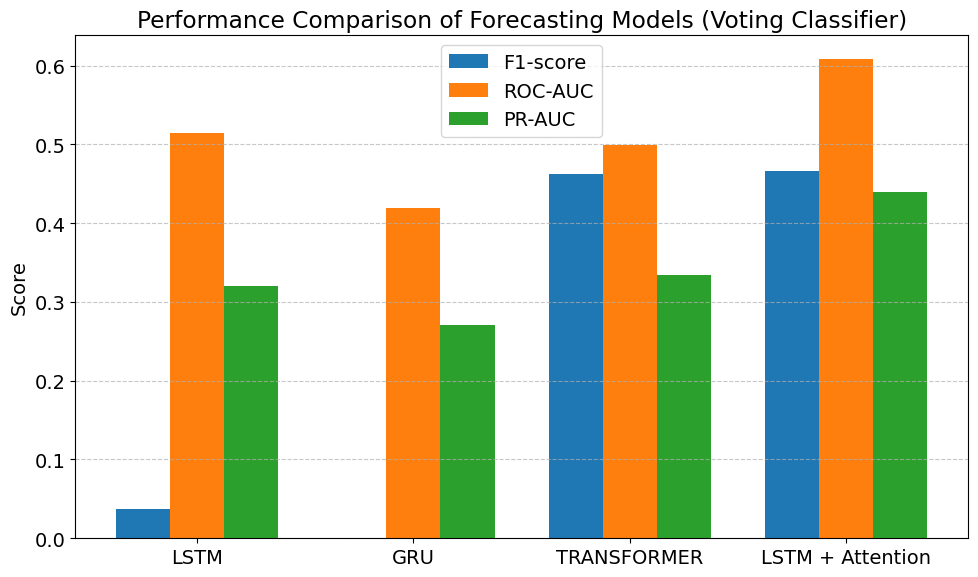

In [23]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
import os
from keras.api.models import load_model

model_list = ["lstm", "gru", "transformer", "lstm_attn"]
SAVE_DIR = "./saved_models/"
VOTING_PATH = os.path.join(SAVE_DIR, "final_voting_model.pkl")
DATA_PATH = "./dow_jones_index.data"

if __name__ == "__main__":
    df = load_and_preprocess(DATA_PATH, win=8, horizon=1)
    feature_cols = df.drop(columns=["fall_risk", "stock", "date"]).columns
    X = df[feature_cols].values
    y = df["fall_risk"].values

    test_idx = []
    for stock, group in df.groupby("stock", sort=False):
        idx = group.sort_values("date").index
        split = len(idx) // 2
        test_idx += idx[split:].tolist()
    test_mask = np.isin(df.index.values, test_idx)
    X_test = X[test_mask]
    y_test = y[test_mask]

    with open(VOTING_PATH, "rb") as f:
        obj = pickle.load(f)
    voting_model = obj["model"]
    scaler = obj["scaler"]
    best_thr = obj["best_threshold"]

    results = []

    for model_name in model_list:
        MODEL_PATH = f"{SAVE_DIR}/{model_name}_weekly_forecast.h5"

        if not os.path.exists(MODEL_PATH):
            print(f"Model files not exist: {MODEL_PATH}")
            continue

        try:
            if model_name == "lstm_attn":
                model = load_model(
                    MODEL_PATH, custom_objects={"SelfAttention": SelfAttention}
                )
            else:
                model = load_model(MODEL_PATH)
            print(f"Loading Model: {model_name}")
        except Exception as e:
            print(f"Failed to load model ({model_name}): {e}")
            continue

        n_sample = X_test.shape[0] - 8
        if n_sample <= 0:
            print(f"Test set too small to construct input sequence!")
            continue

        seq_X = np.array([X_test[i : i + 8] for i in range(n_sample)])
        input_scaler = StandardScaler().fit(seq_X.reshape(seq_X.shape[0], -1))
        seq_X_scaled = input_scaler.transform(
            seq_X.reshape(seq_X.shape[0], -1)
        ).reshape(seq_X.shape)

        y_pred_feat = model.predict(seq_X_scaled)
        X_pred_scaled = scaler.transform(y_pred_feat)
        y_proba = voting_model.predict_proba(X_pred_scaled)[:, 1]
        y_pred = (y_proba >= best_thr).astype(int)

        aligned_y_true = y_test[8 : 8 + len(y_pred)]

        f1 = f1_score(aligned_y_true, y_pred)
        roc = roc_auc_score(aligned_y_true, y_proba)
        pr = average_precision_score(aligned_y_true, y_proba)

        results.append(
            {
                "Model": model_name,
                "F1-score": f"{f1:.4f}",
                "ROC-AUC": f"{roc:.4f}",
                "PR-AUC": f"{pr:.4f}",
            }
        )

    print("\nPredictive scores of the four models on the test set:")
    print(pd.DataFrame(results).to_string(index=False))
    
# Draw model performance visualization comparisons
# Convert the result to a DataFrame and make sure the values are float
df = pd.DataFrame(results)
df["Model"] = (
    df["Model"]
    .str.upper()
    .str.replace("_", " + ")
    .str.replace("LSTM + ATTN", "LSTM + Attention")
)
df["F1-score"] = df["F1-score"].astype(float)
df["ROC-AUC"] = df["ROC-AUC"].astype(float)
df["PR-AUC"] = df["PR-AUC"].astype(float)

x = range(len(df))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in x], df["F1-score"], width=bar_width, label="F1-score")
plt.bar(x, df["ROC-AUC"], width=bar_width, label="ROC-AUC")
plt.bar([i + bar_width for i in x], df["PR-AUC"], width=bar_width, label="PR-AUC")

plt.xticks(x, df["Model"])
plt.ylabel("Score")
plt.title("Performance Comparison of Forecasting Models (Voting Classifier)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import os

model_list = ["lstm", "gru", "transformer", "lstm_attn"]

if __name__ == "__main__":
    SAVE_DIR = "./saved_models/"
    MODEL_PATH = os.path.join(SAVE_DIR, "final_voting_model.pkl")

    with open(MODEL_PATH, "rb") as f:
        obj = pickle.load(f)
    voting_model = obj["model"]
    scaler = obj["scaler"]
    best_thr = obj["best_threshold"]

    results = []

    for model_name in model_list:
        CSV_PATH = f"{SAVE_DIR}/{model_name}_predicted_next_week.csv"

        if not os.path.exists(CSV_PATH):
            print(f"Predictive feature file not exist: {CSV_PATH}")
            continue

        pred_df = pd.read_csv(CSV_PATH)
        X = scaler.transform(pred_df.values)

        proba = voting_model.predict_proba(X)[:, 1]
        label = (proba >= best_thr).astype(int)

        results.append(
            {
                "Model": model_name,
                "Fall Risk Proba": f"{proba[0]:.4f}",
                "Fall Risk Label": int(label[0]),
            }
        )

    # Print Comparison table
    print("\nComparison of fall risk predictions of different models:")
    print(pd.DataFrame(results).to_string(index=False))



Comparison of fall risk predictions of different models:
      Model Fall Risk Proba  Fall Risk Label
       lstm          0.0077                0
        gru          0.0042                0
transformer          0.4080                1
  lstm_attn          0.2808                1
